##### Load required packages

In [59]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from cmath import nan
from sklearn.metrics import confusion_matrix

##### Load data

In [60]:
''' 
mat_load = sio.loadmat('C:/Users/Zephyrus/Desktop/data/respPeak.mat')['x']
roi_load = sio.loadmat('C:/Users/Zephyrus/Desktop/data/allROIPositions.mat')['allROIPositions']
ind_load = sio.loadmat('C:/Users/Zephyrus/Desktop/data/blFinalHit.mat')['blFinalHit']
'''
mat_load = sio.loadmat('C:/Users/m.nedeljkovic/Desktop/data/allTraces.mat')['allTraces']
roi_load = sio.loadmat('C:/Users/m.nedeljkovic/Desktop/data/allROIPositions.mat')['allROIPositions']
ind_load = sio.loadmat('C:/Users/m.nedeljkovic/Desktop/data/blFinalHit.mat')['blFinalHit']

In [61]:
'''
list1 = sio.loadmat('C:/Users/Zephyrus/Desktop/data/indicesSession1.mat')['indSess1']
list2 = sio.loadmat('C:/Users/Zephyrus/Desktop/data/List2.mat')['List2']
list3 = sio.loadmat('C:/Users/Zephyrus/Desktop/data/List3.mat')['List3']
list4 = sio.loadmat('C:/Users/Zephyrus/Desktop/data/List4.mat')['List4']
'''

list1 = sio.loadmat('C:/Users/m.nedeljkovic/Desktop/data/indicesSession1.mat')['indSess1']
list2 = sio.loadmat('C:/Users/m.nedeljkovic/Desktop/data/List2.mat')['List2']
list3 = sio.loadmat('C:/Users/m.nedeljkovic/Desktop/data/List3.mat')['List3']
list4 = sio.loadmat('C:/Users/m.nedeljkovic/Desktop/data/List4.mat')['List4']

## Data preparation for the CNN models

- 1 region, all info about speakers, 4 sessions, white noise, 50 info per neuron (per speaker), 100 neurons per region => image 100x250(5x50) - 8 of them (2 states x 4 sessions) x 30 (sampling points over time)
- final 240 images (120 per state)
- oversampling input images with NaNs (maybe random oversampling)
- representing input images as different stimulus (100 x 50)
- combination of 2 different regions in one image / mice????
- including bandpass noise into data representation 
- representing input images as different stimulus (100 x 50)

### 1. One image - all regions, all speakers, neurons (oversampling with NaNs) - 100x60 (400)
- approx 100 neurons per region x 60 (5 speakers x 12 regions)
- 50 values x 4 sessions x 2 states -> 200 images per state

C:\Users\m.nedeljkovic\AppData\Local\Temp\ipykernel_18756\242471619.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(figsize=(20,20))


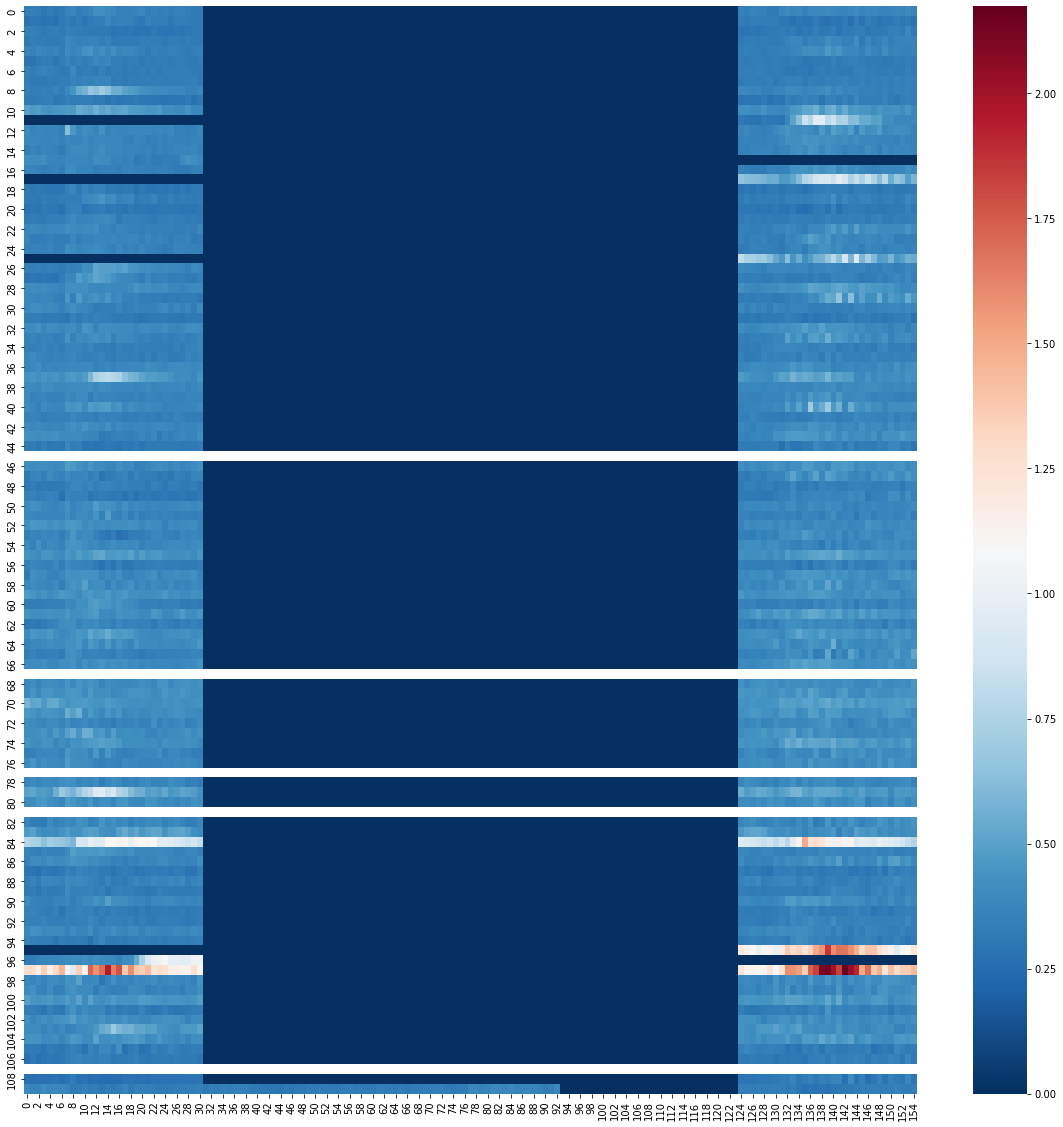

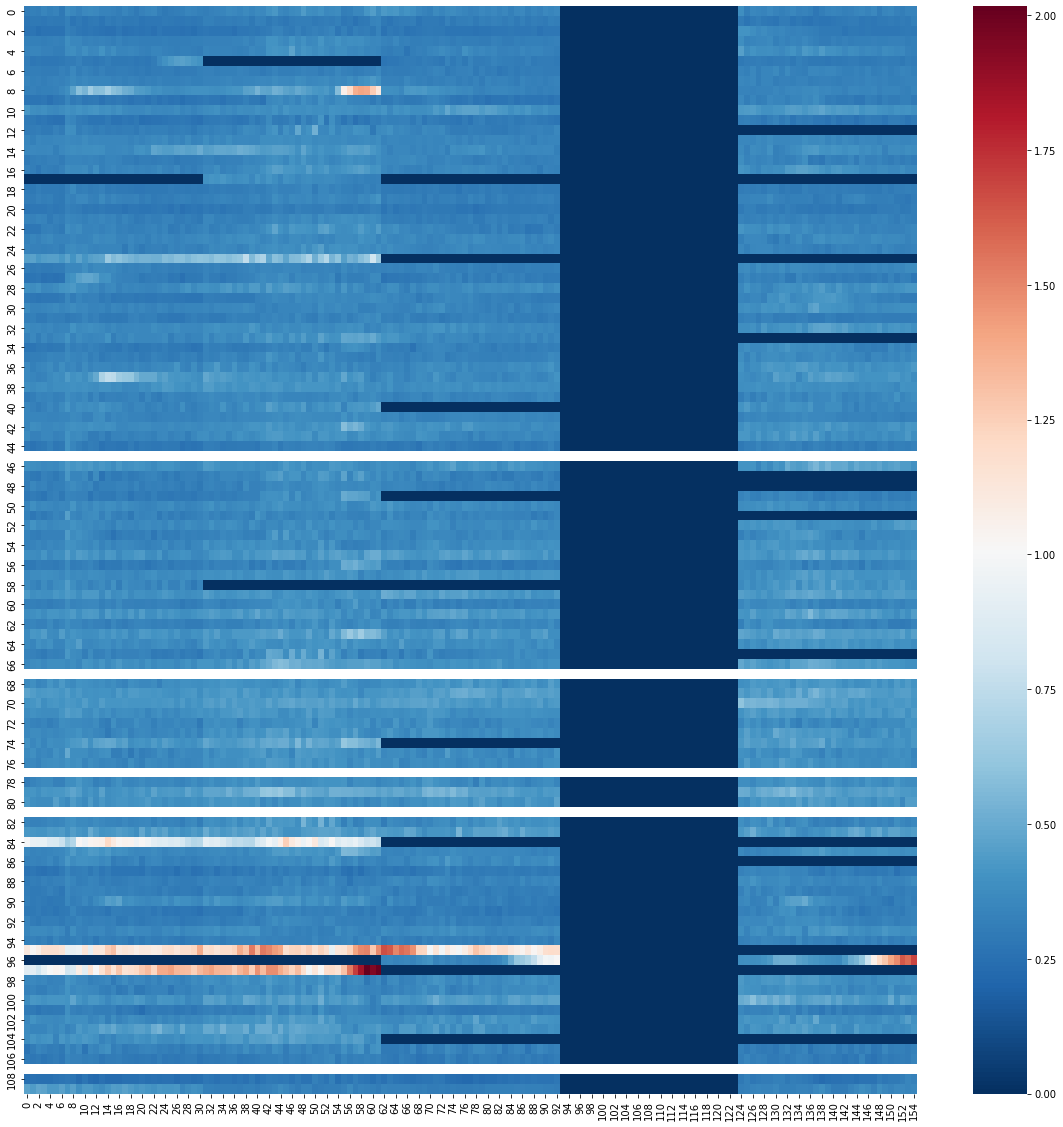

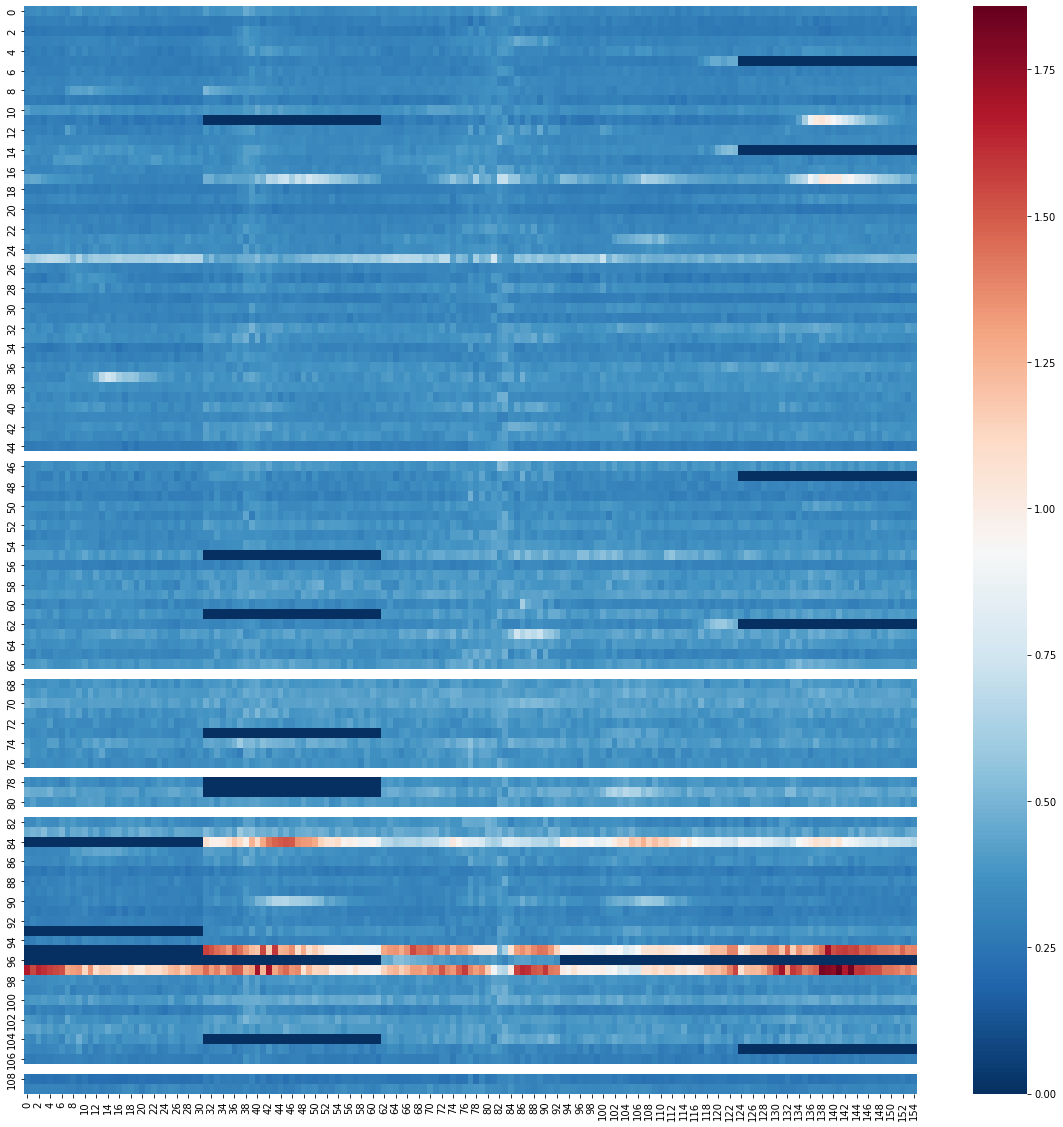

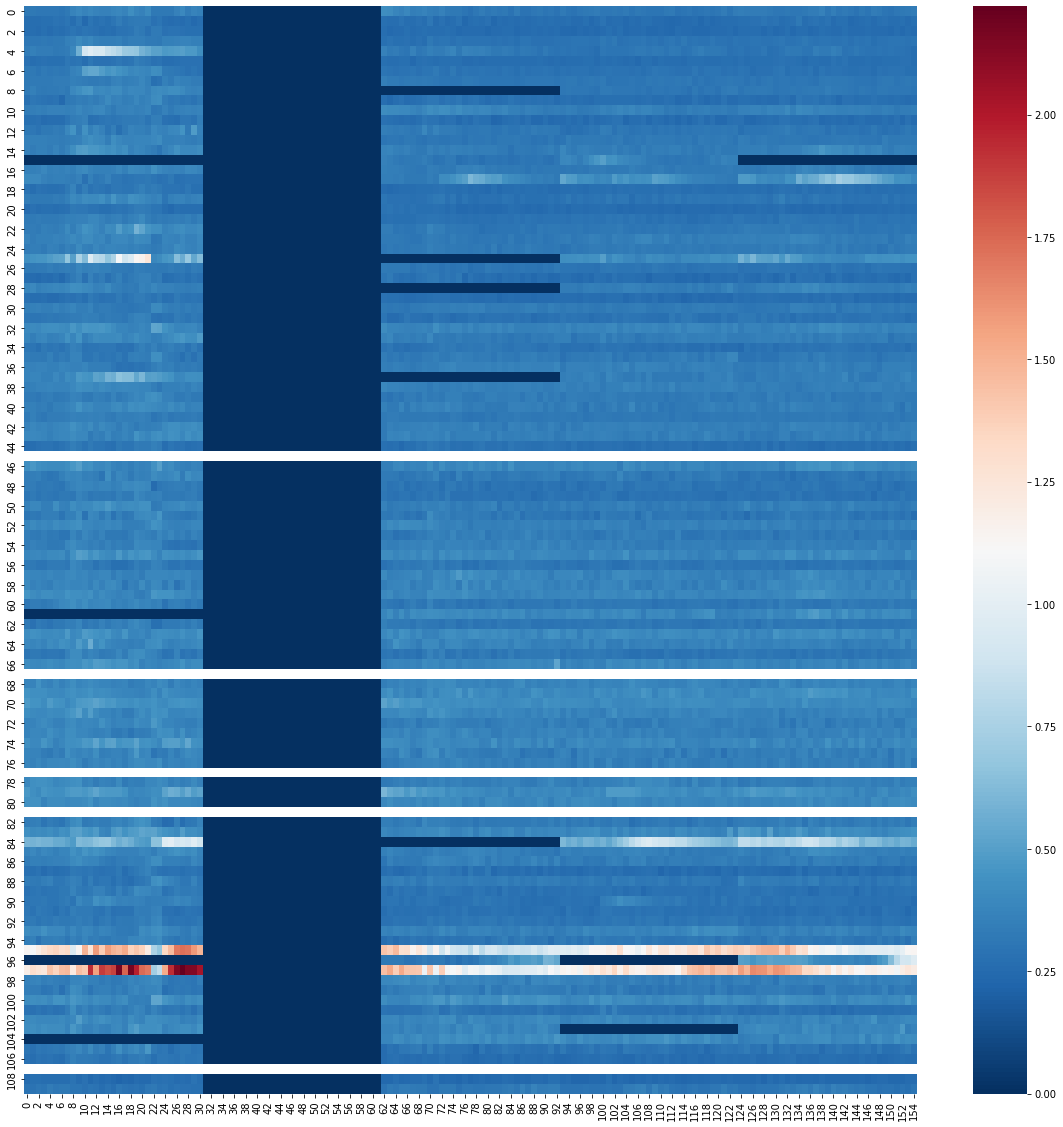

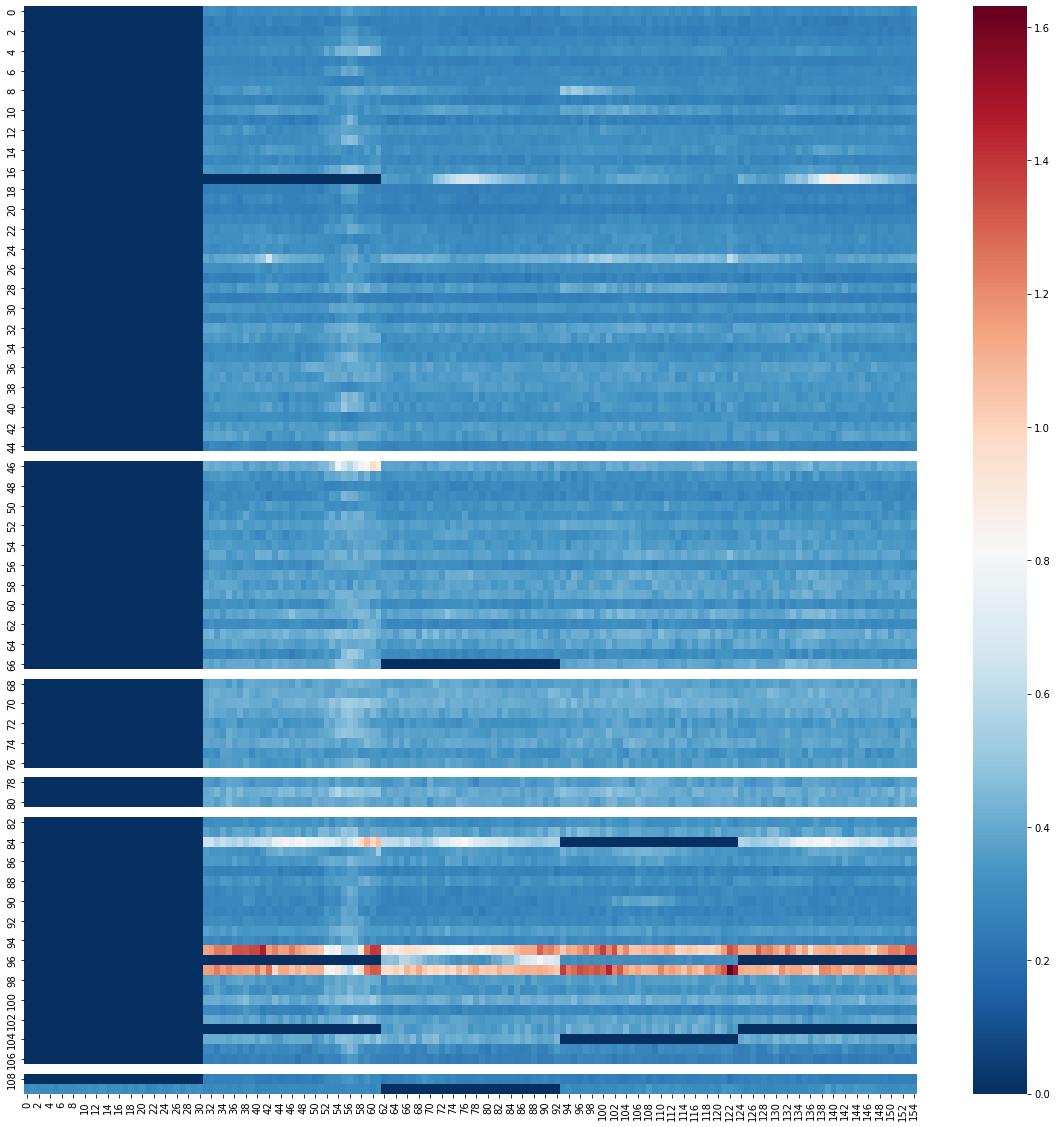

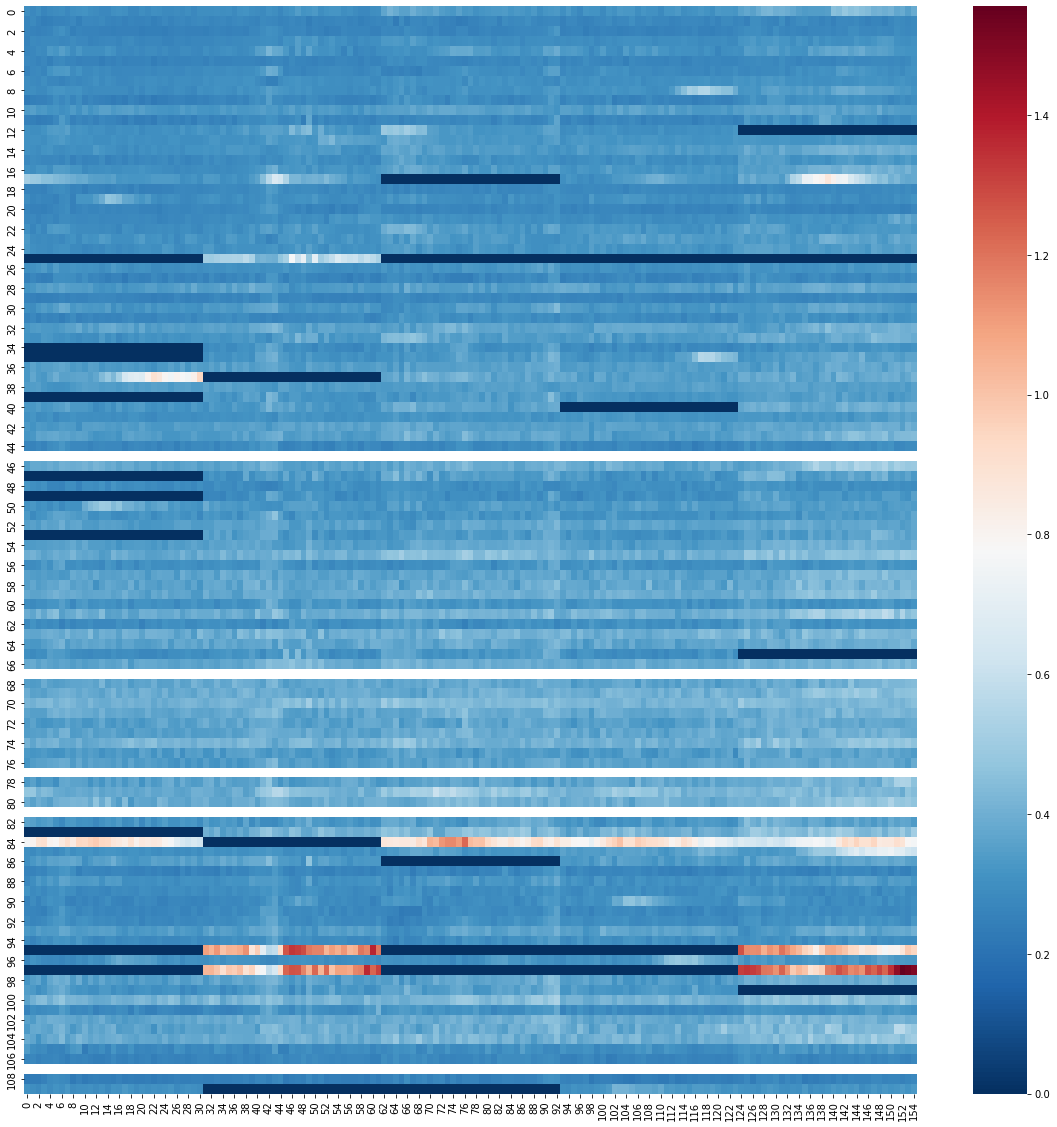

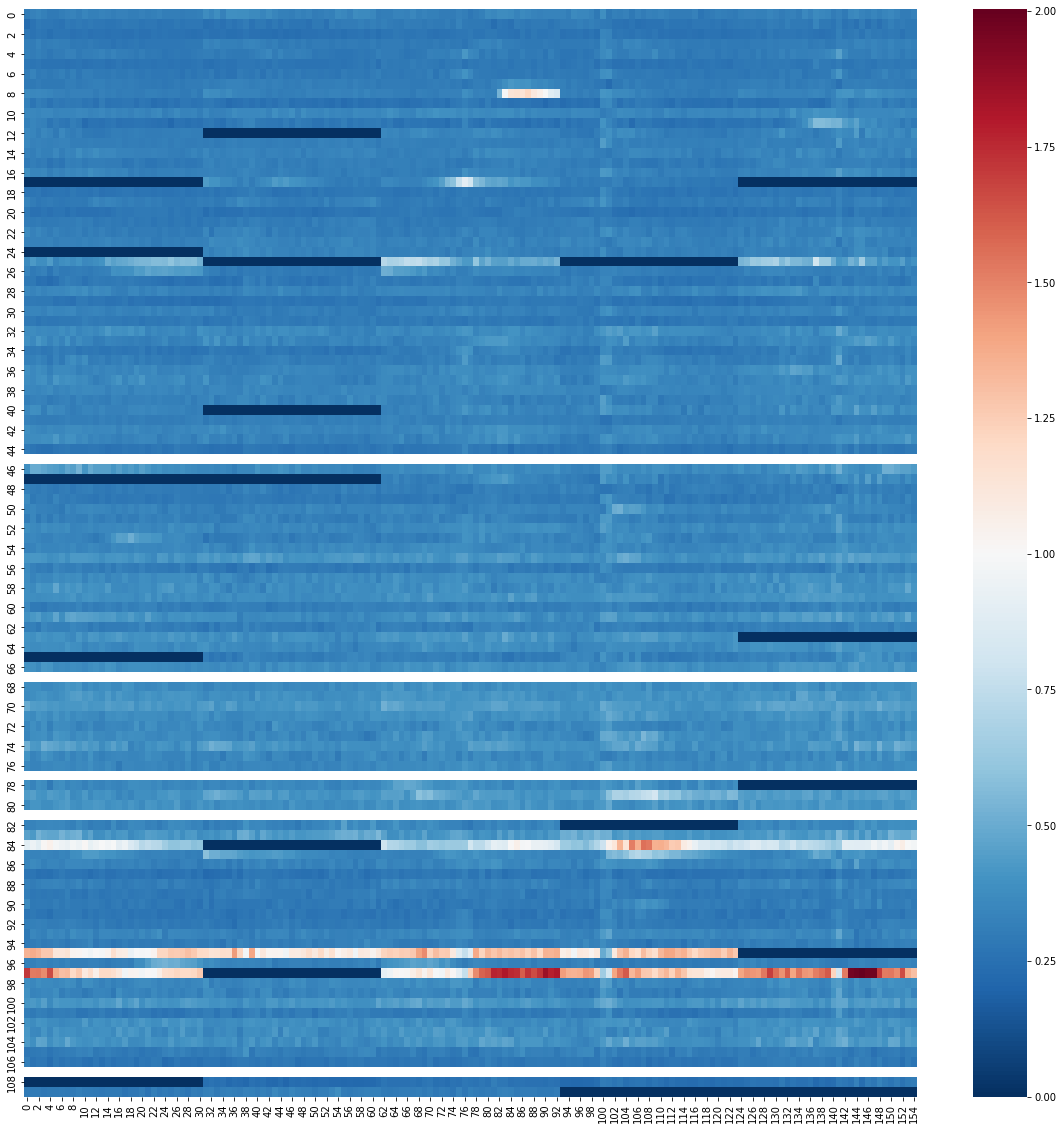

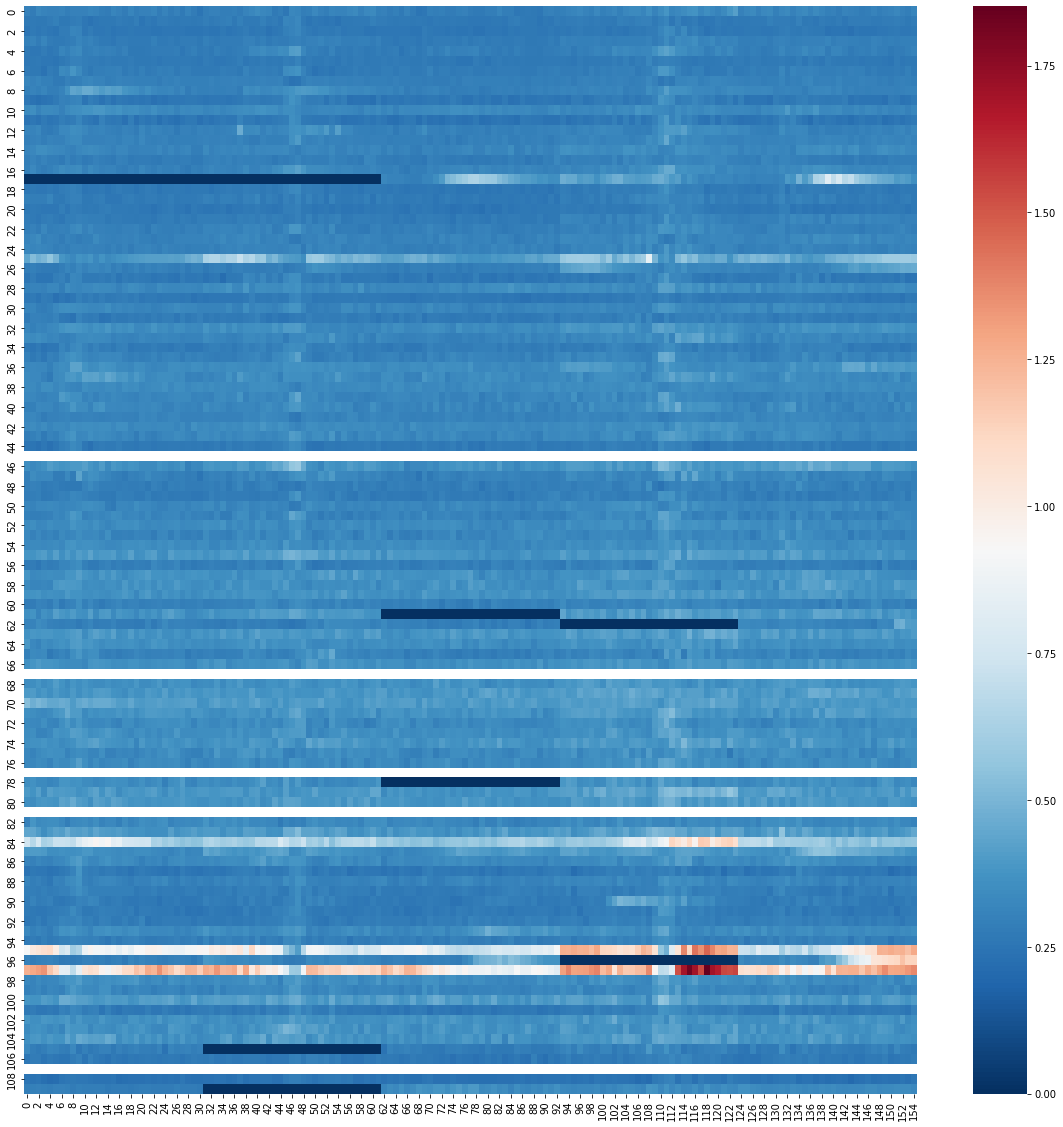

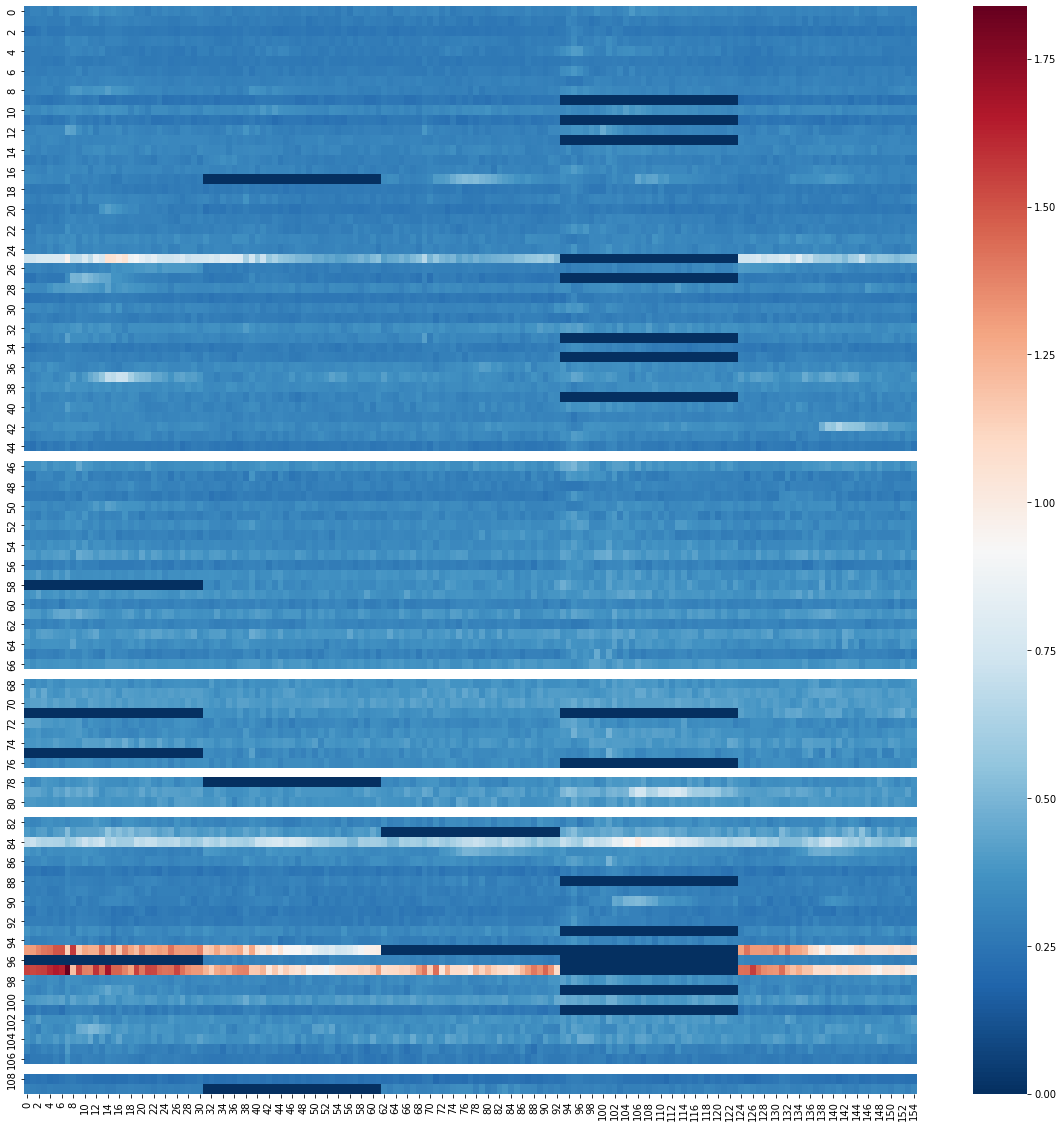

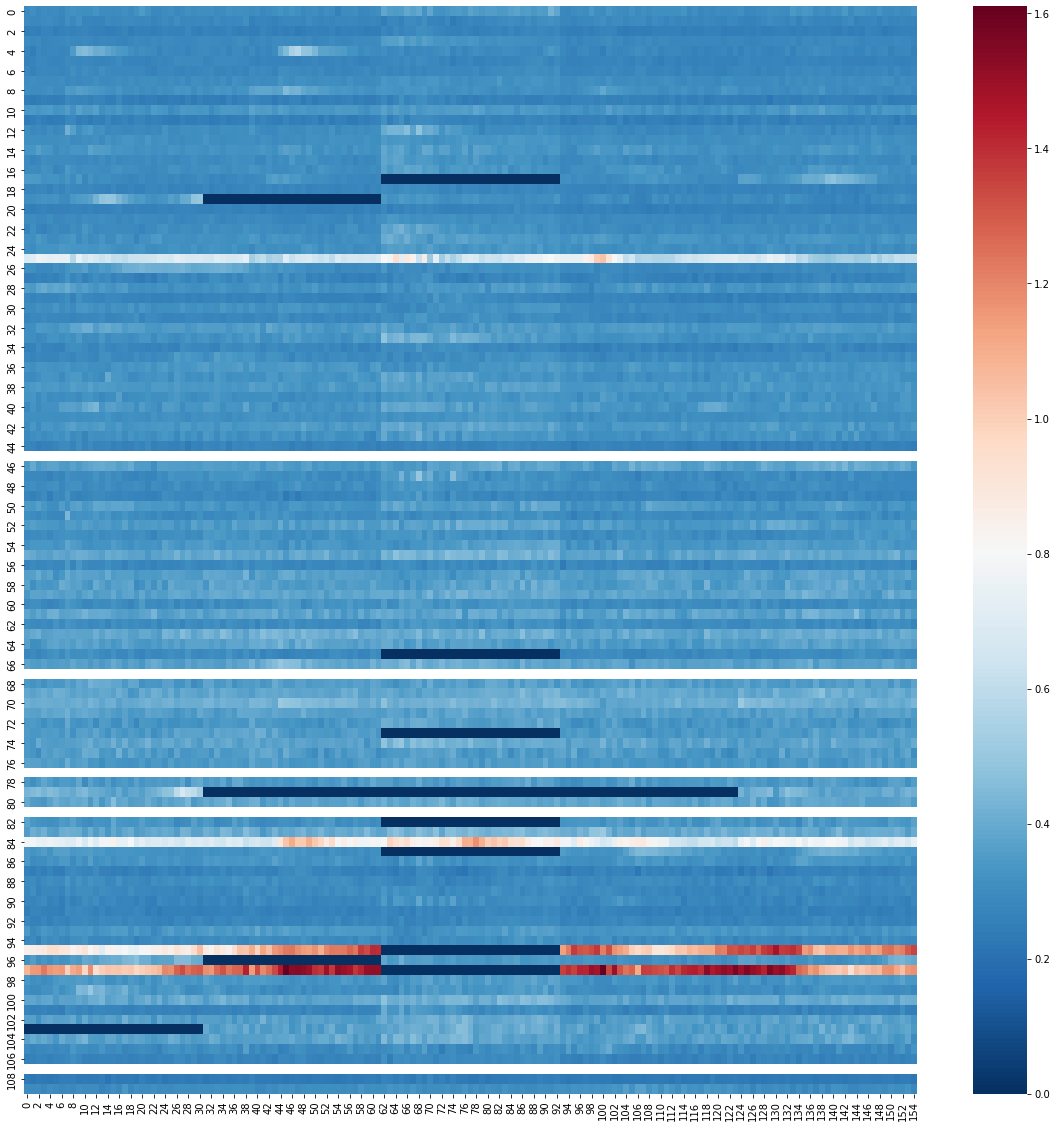

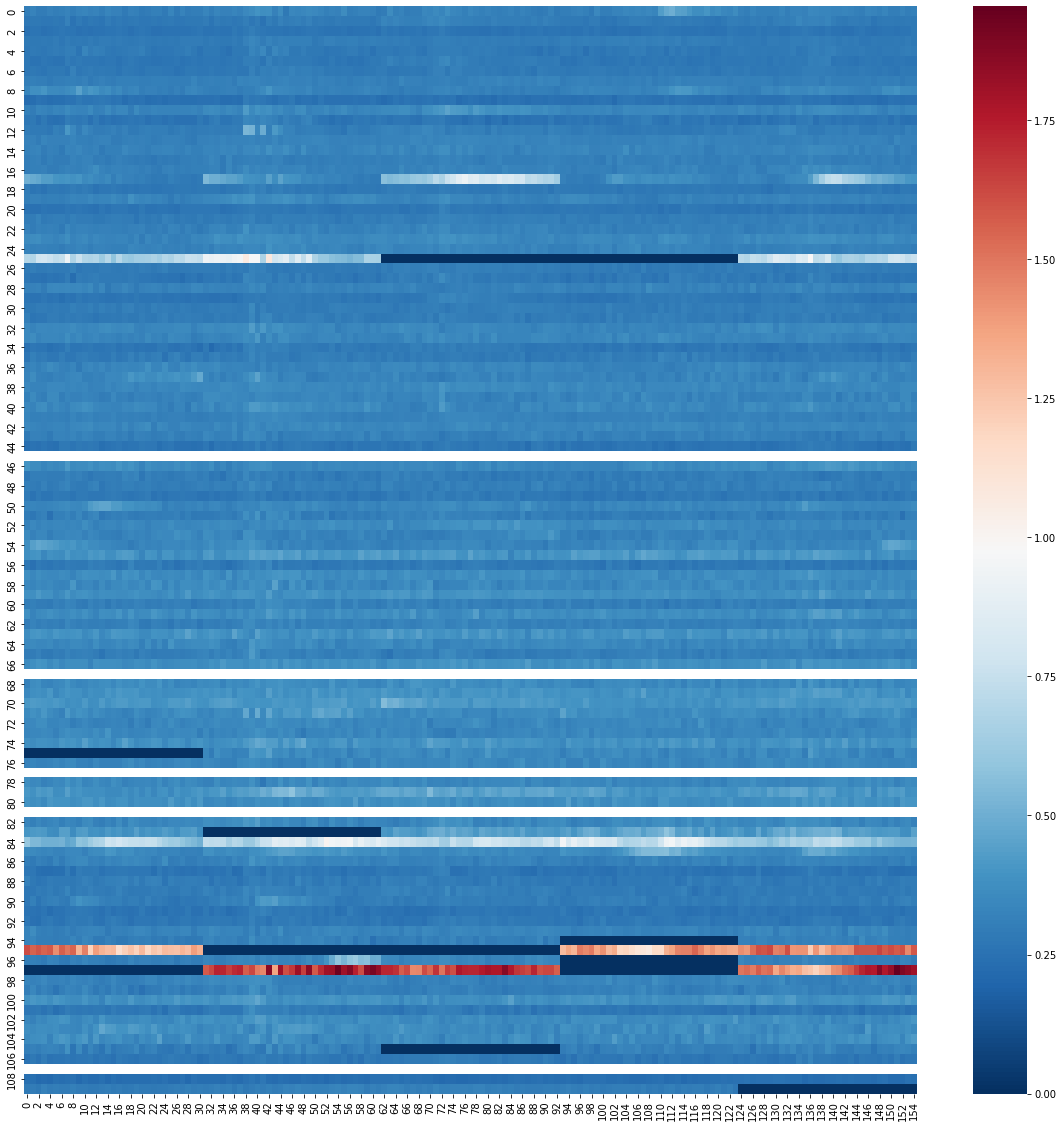

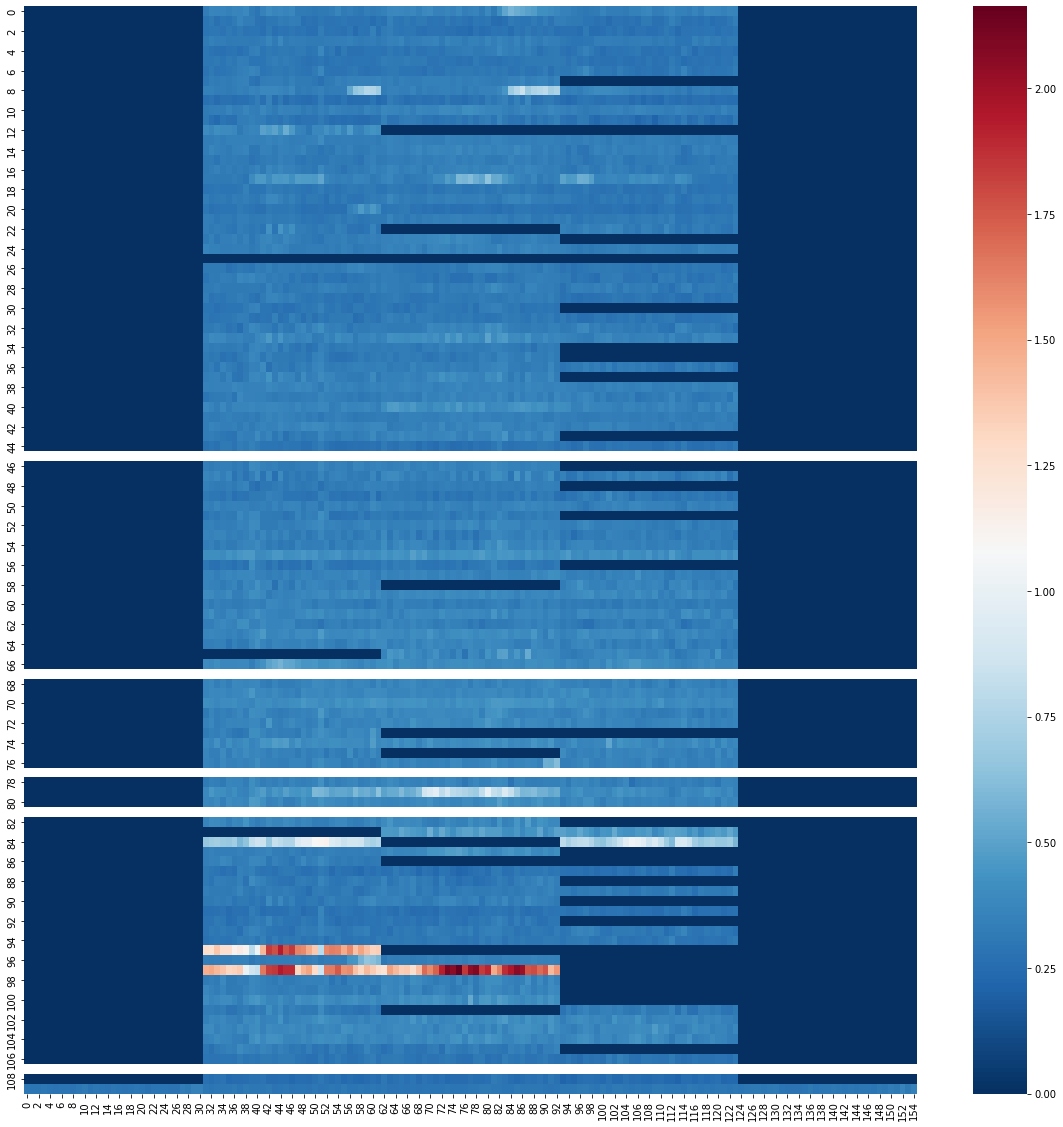

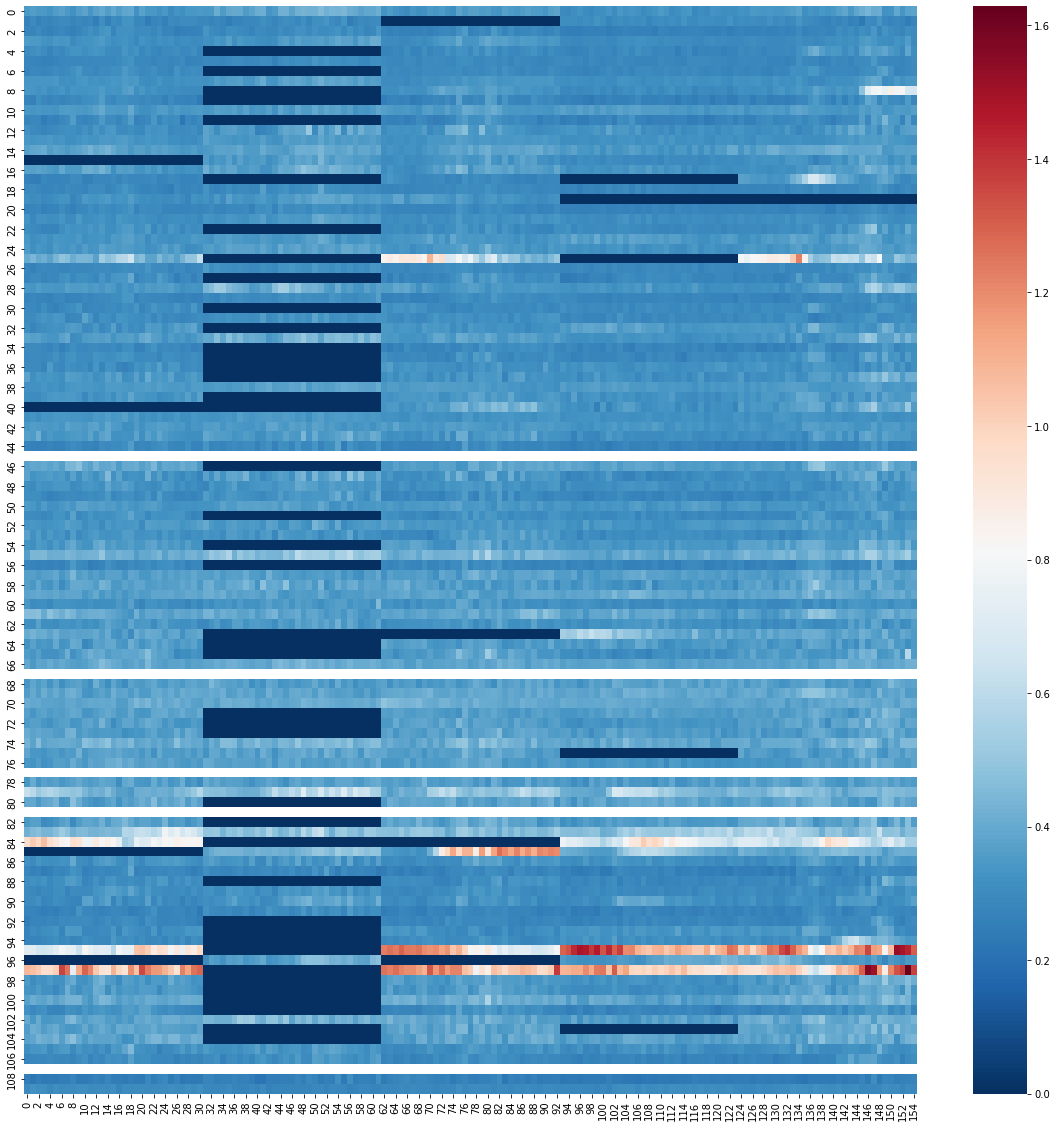

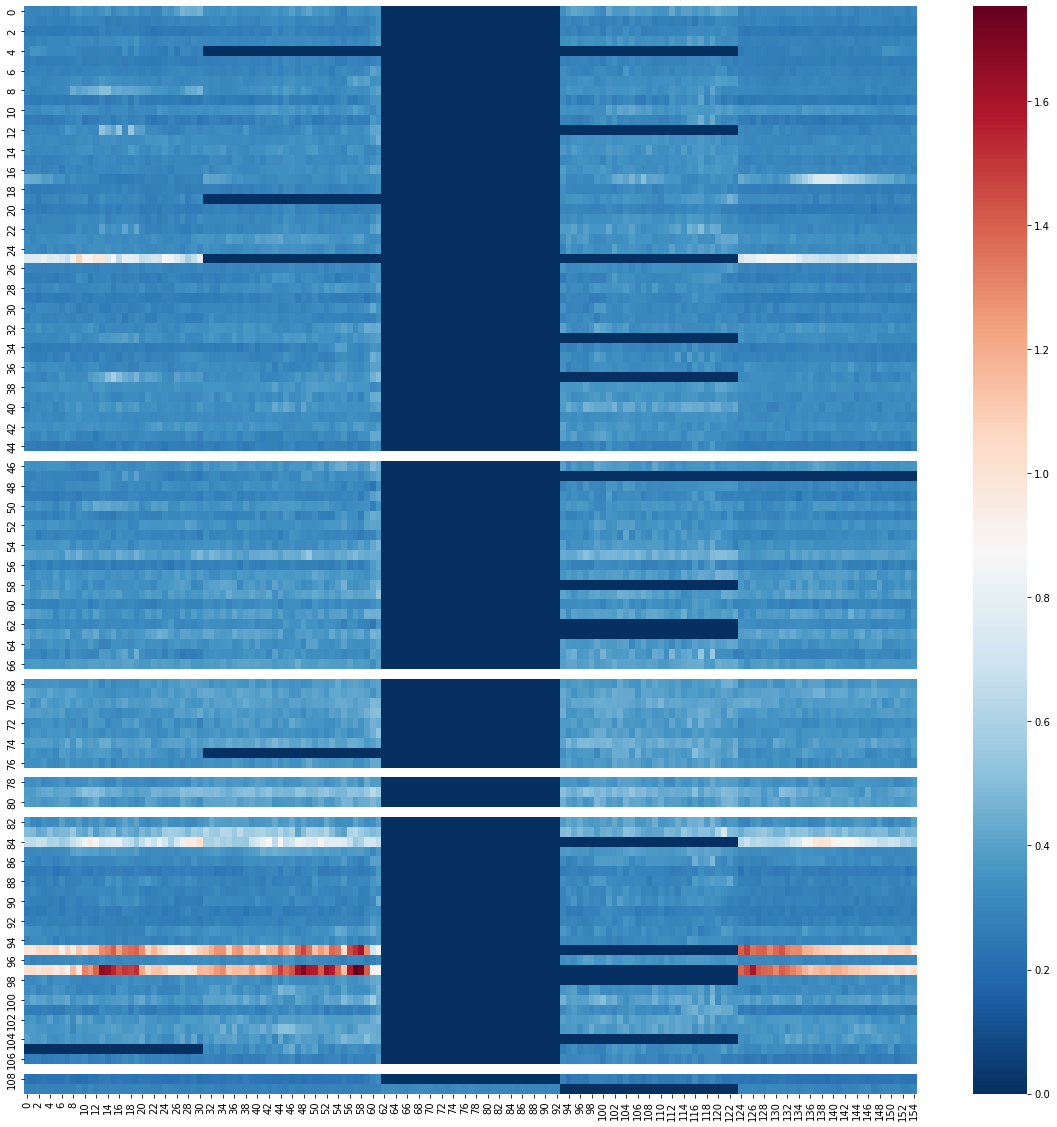

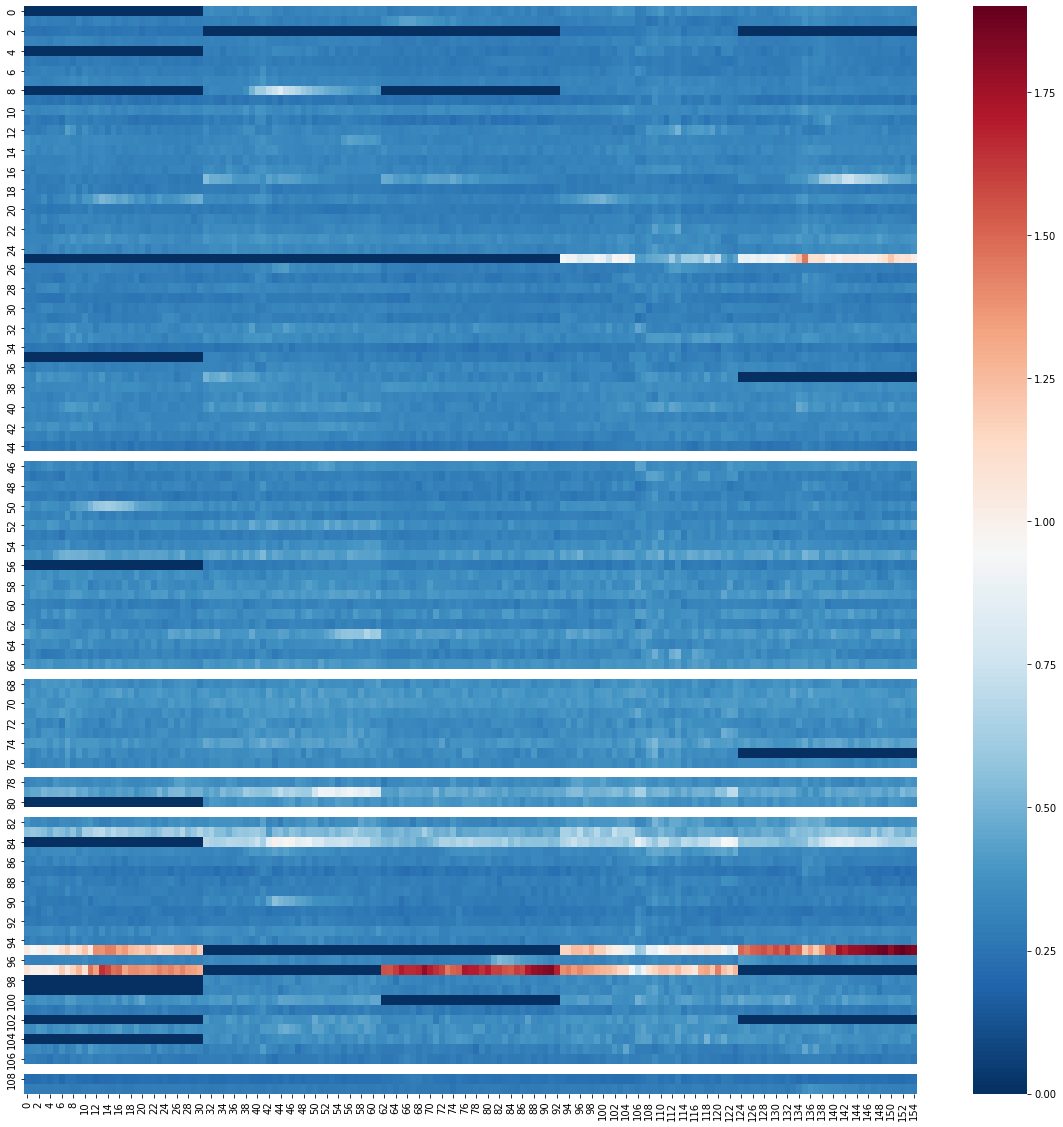

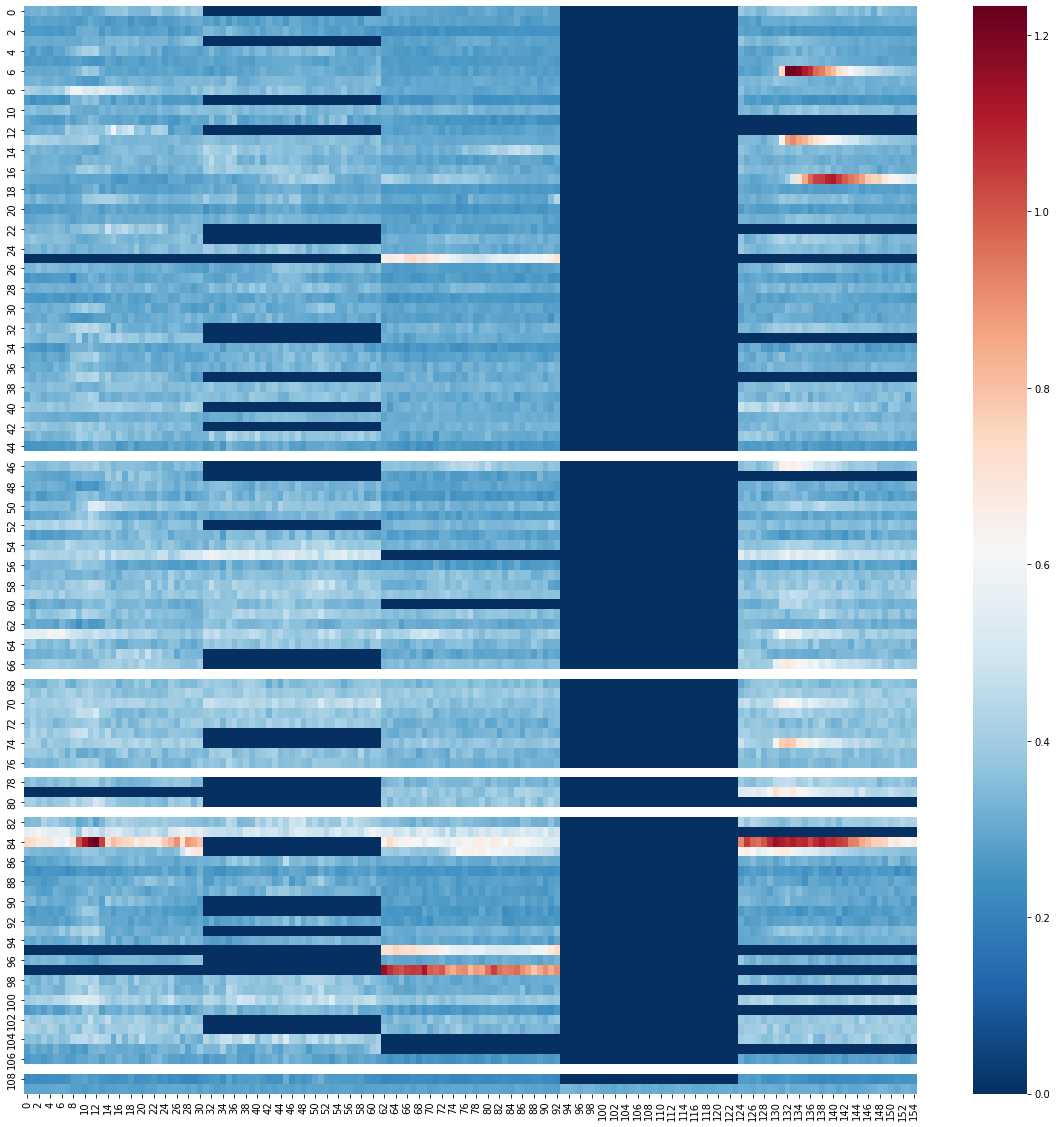

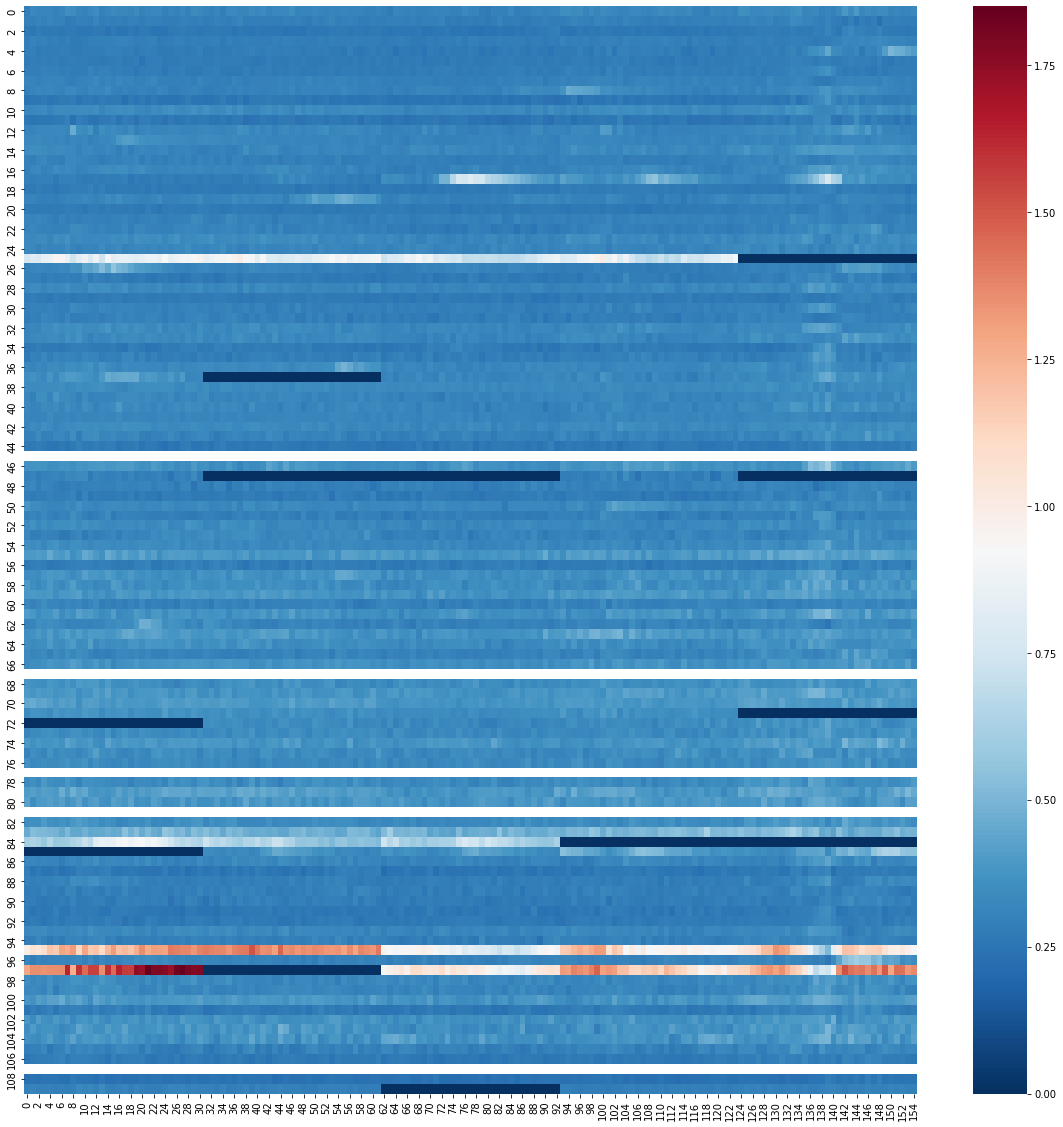

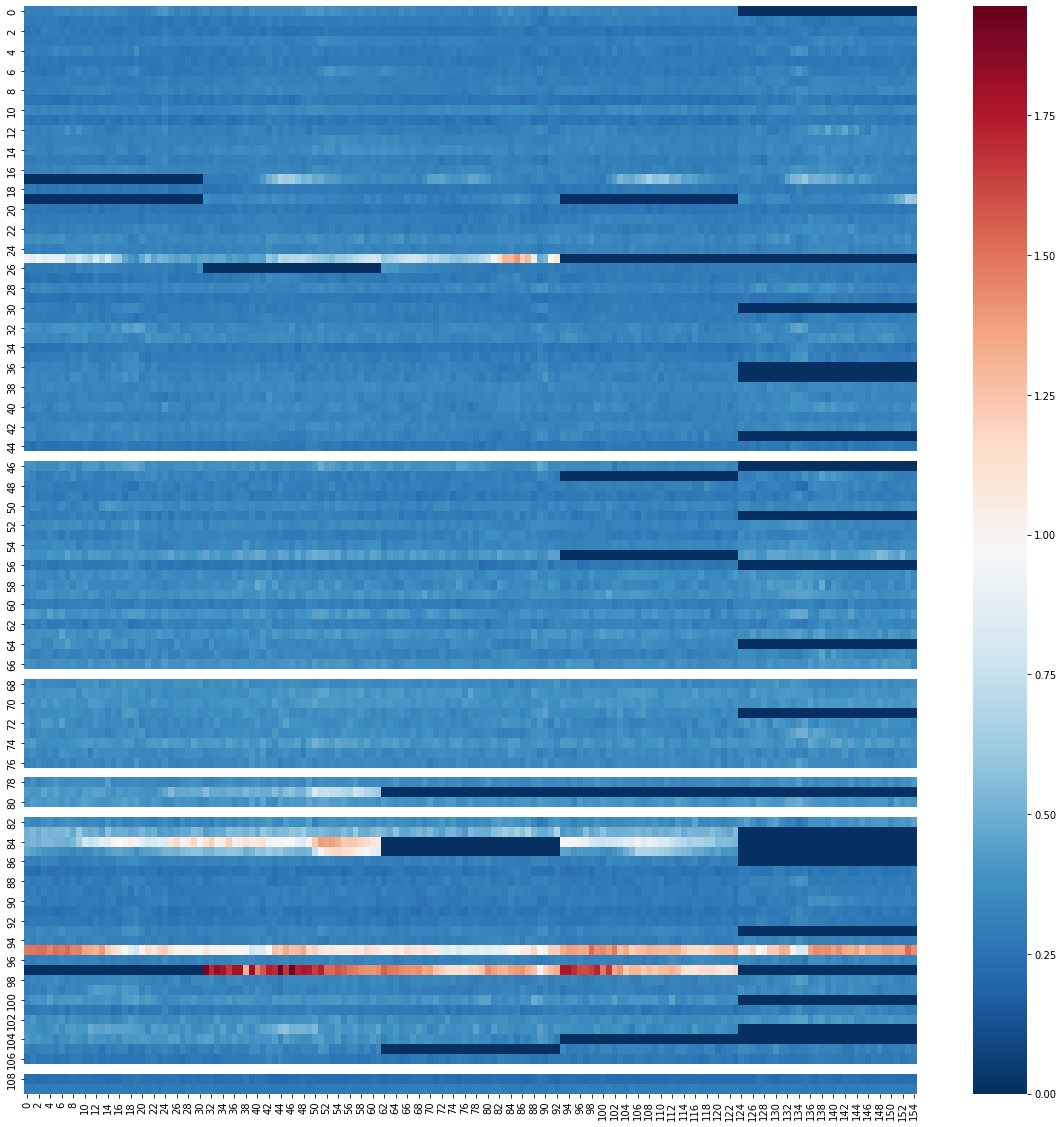

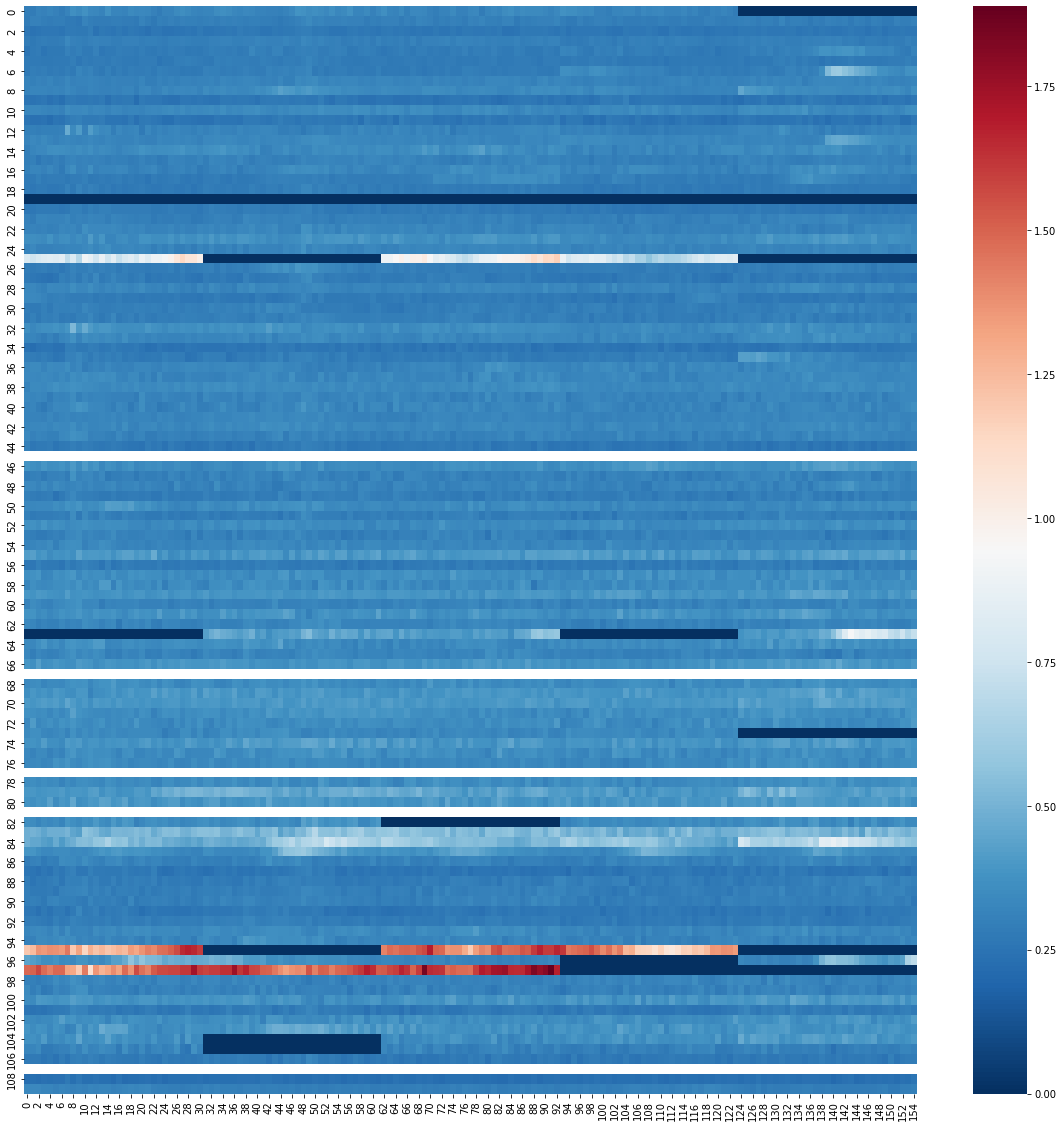

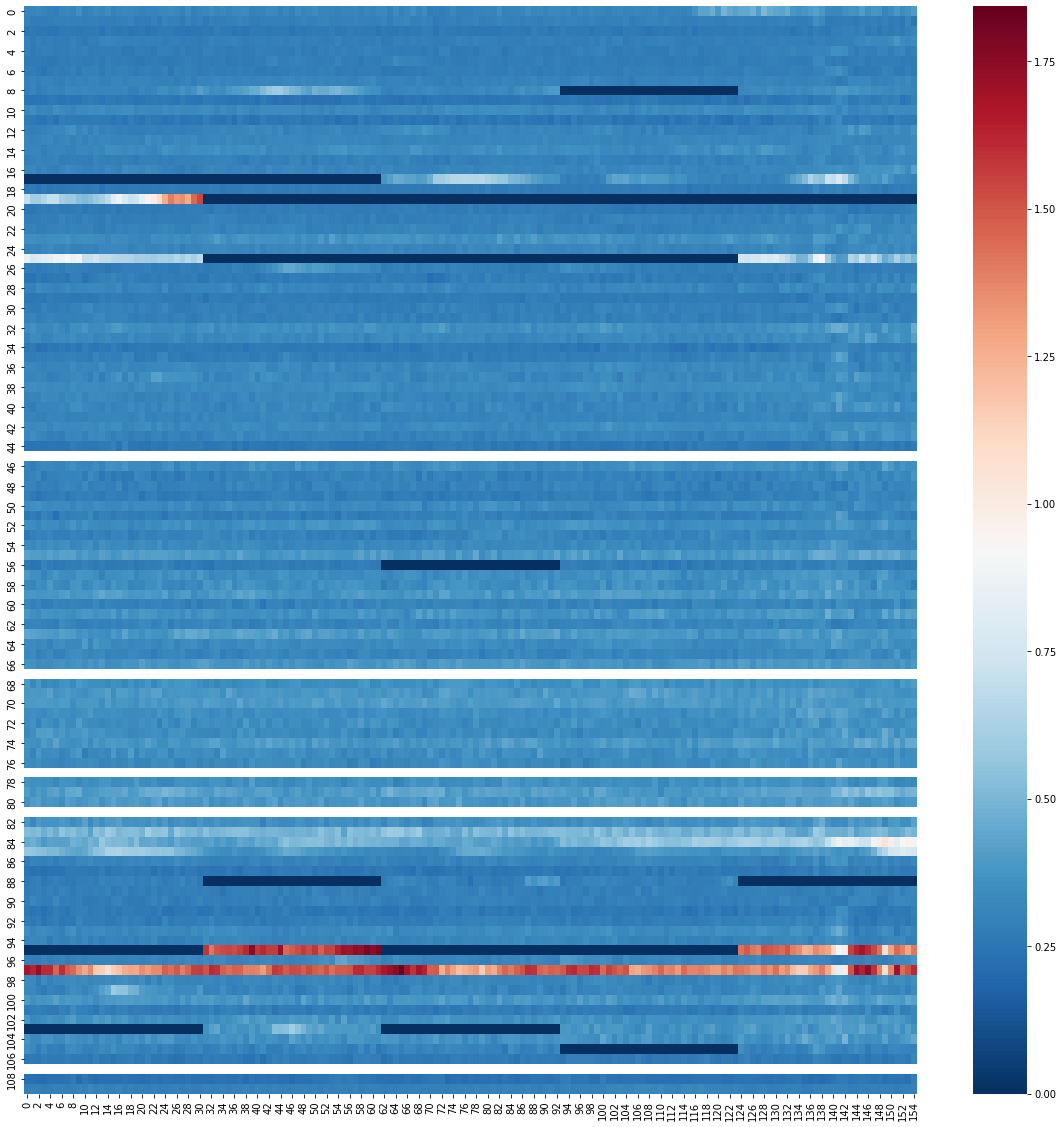

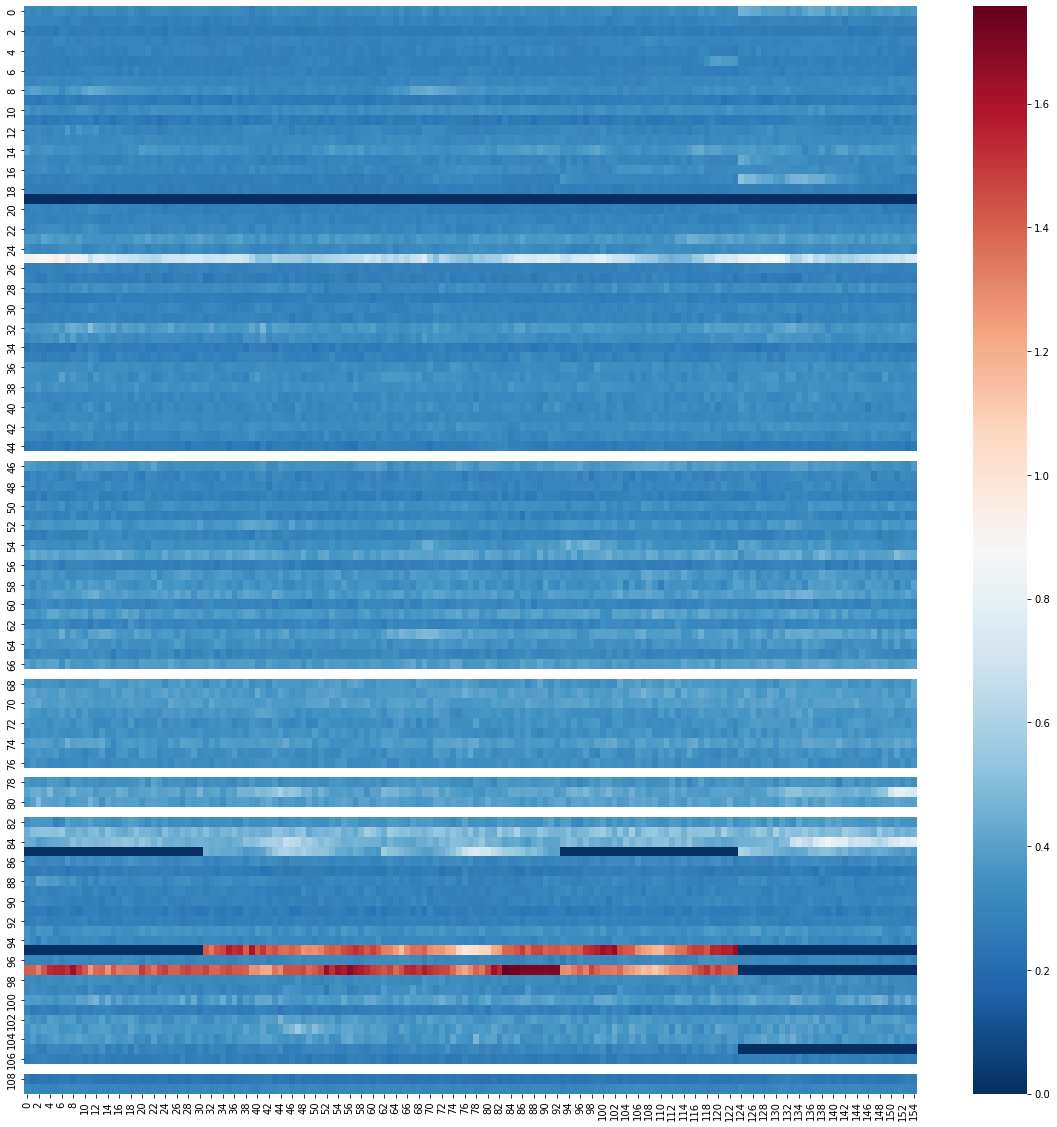

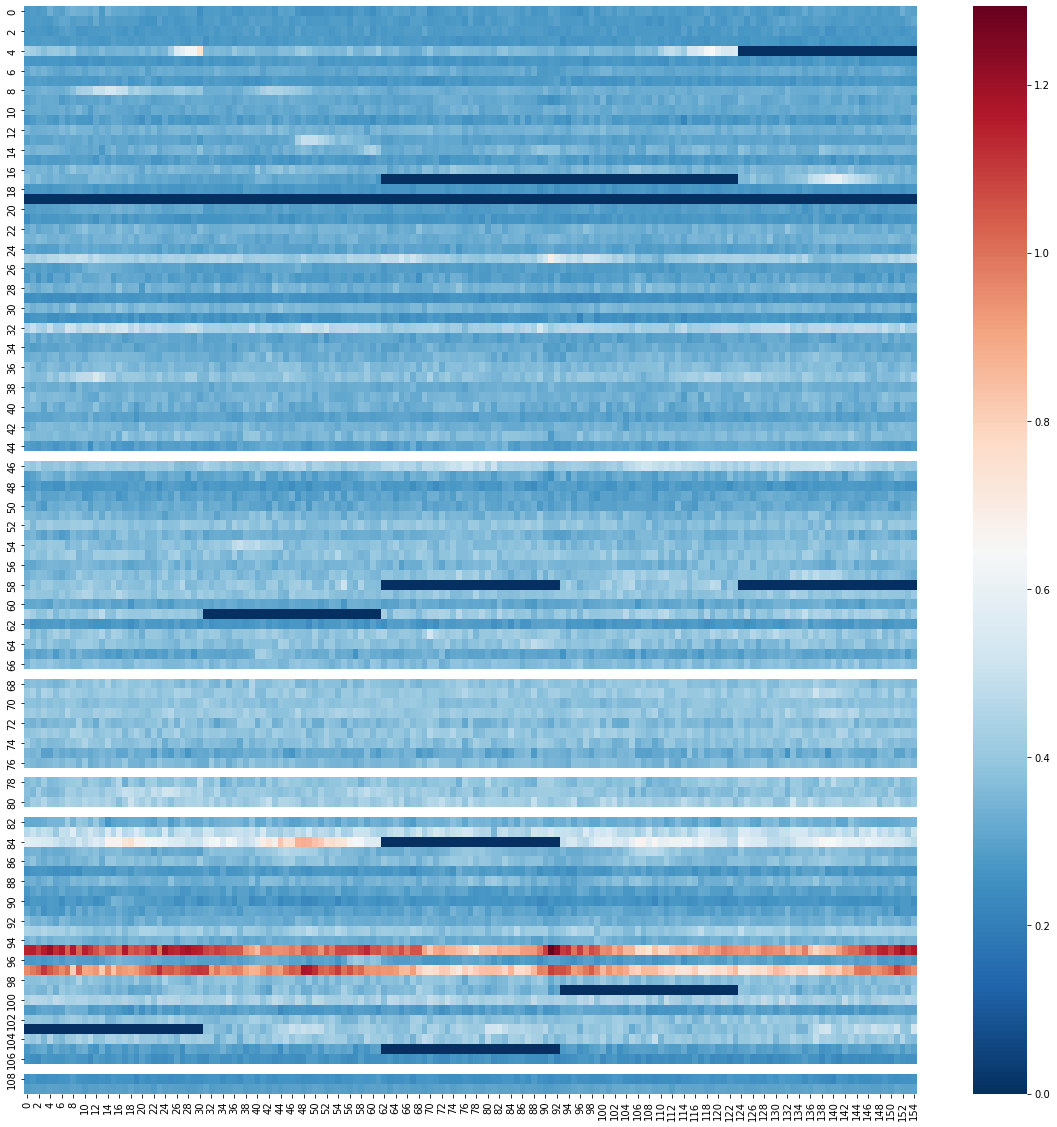

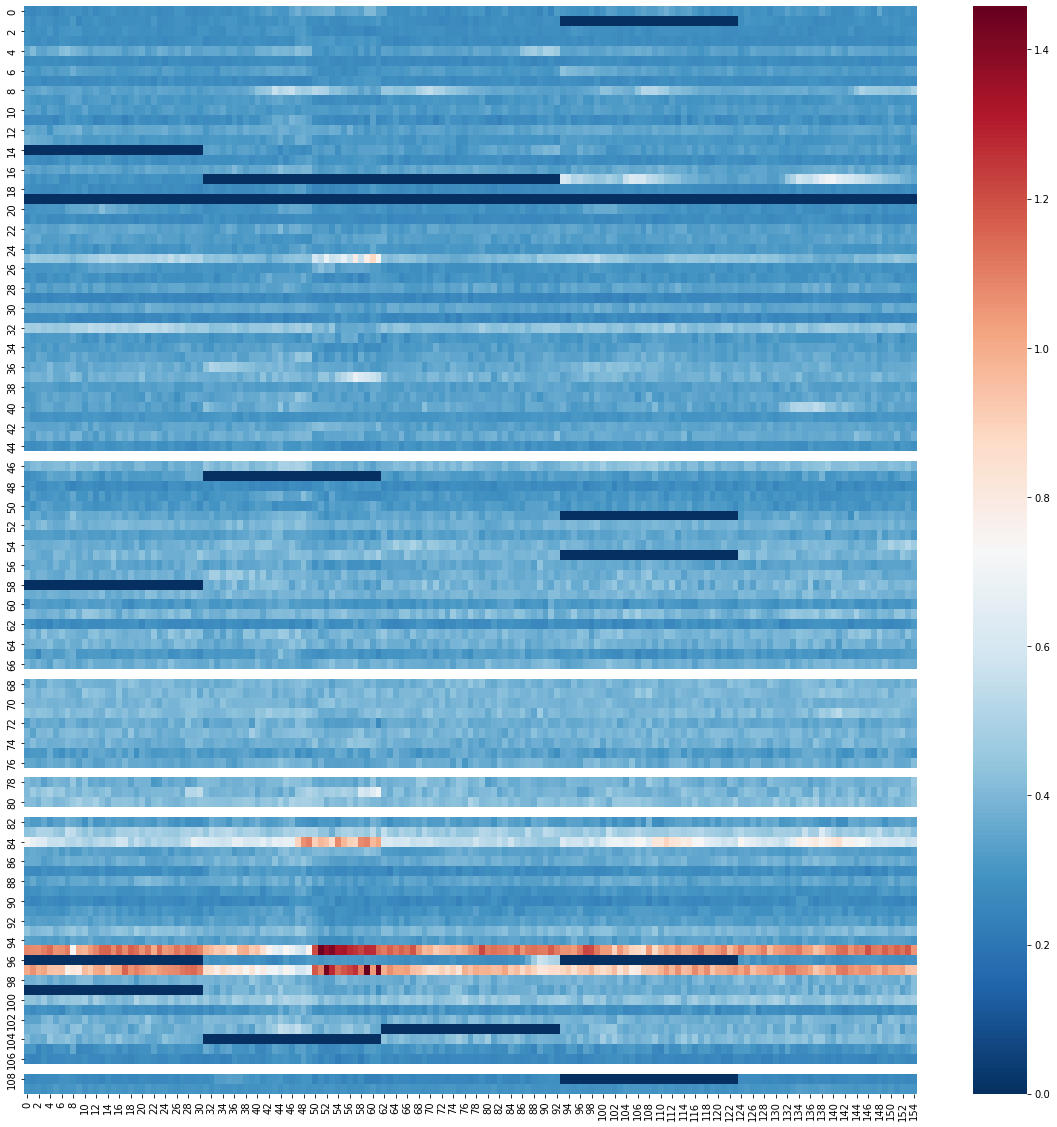

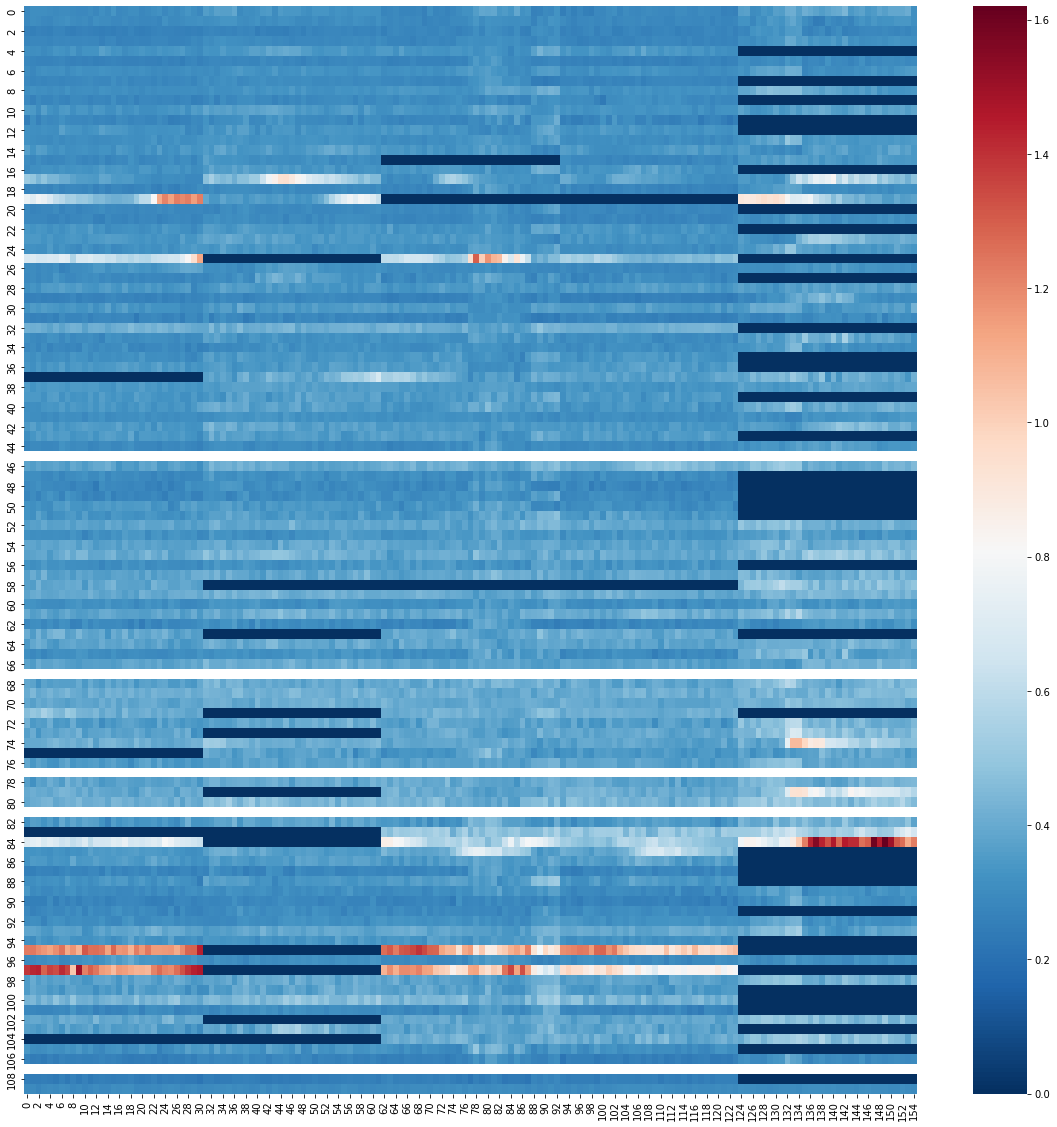

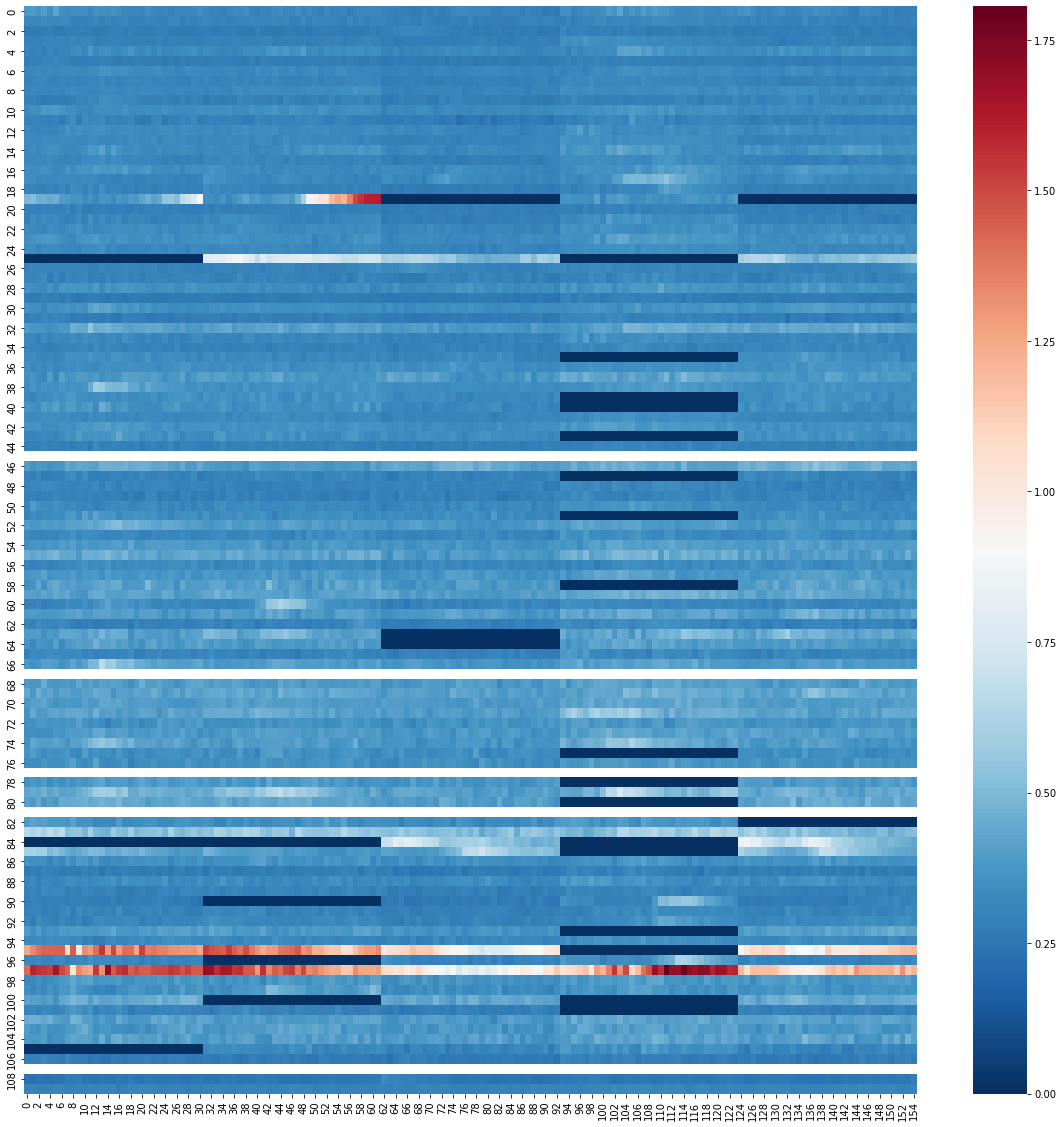

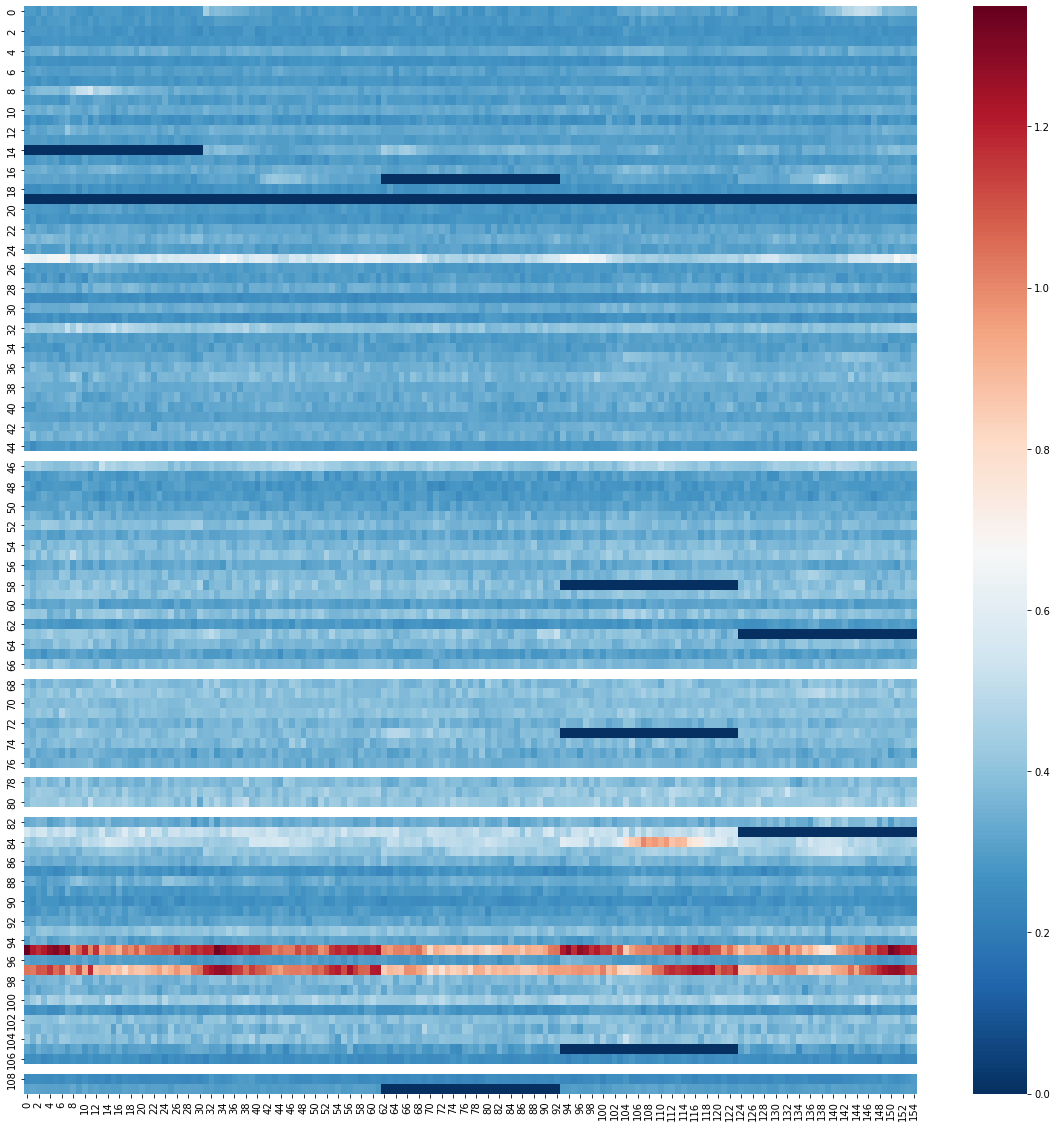

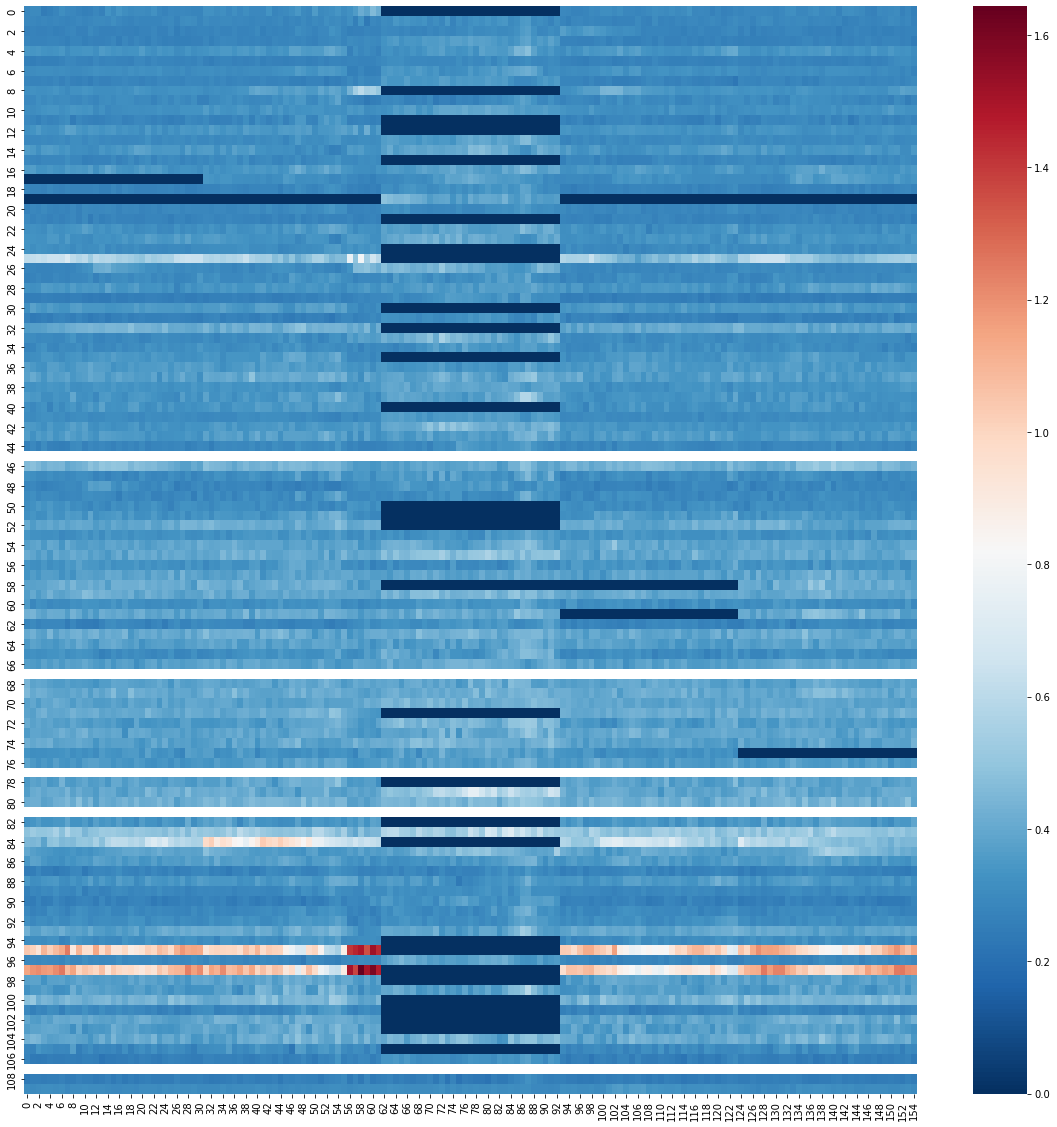

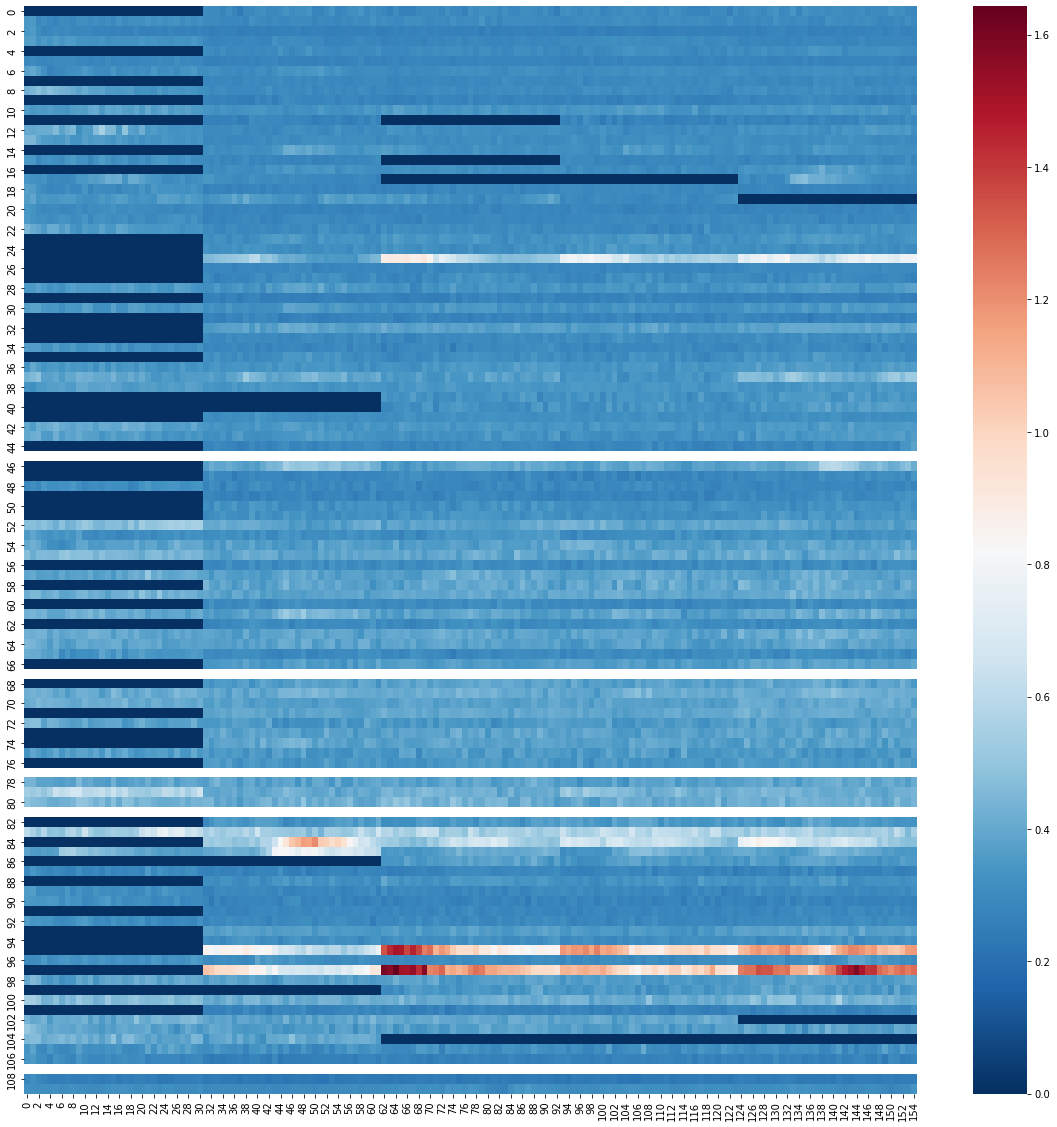

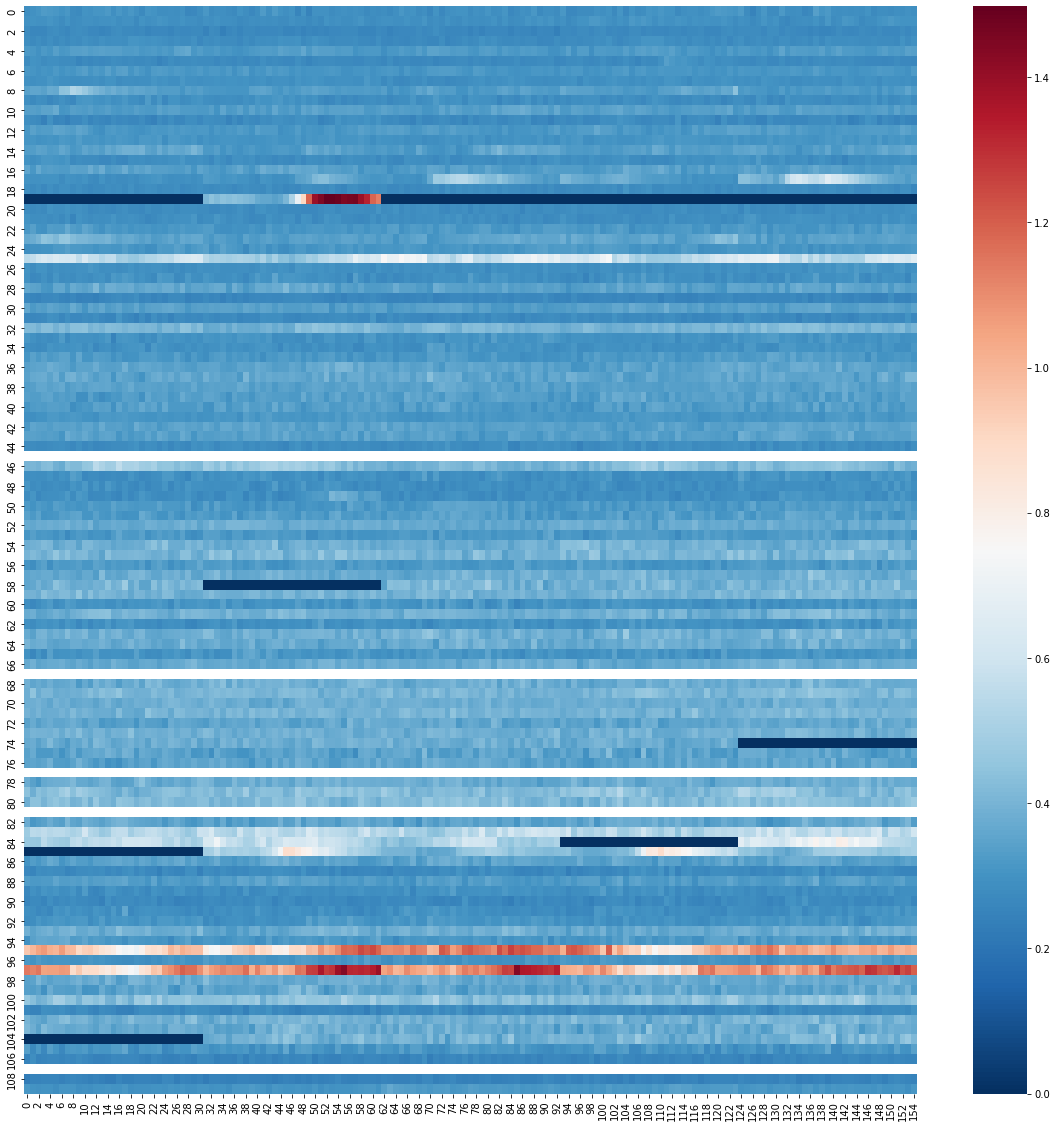

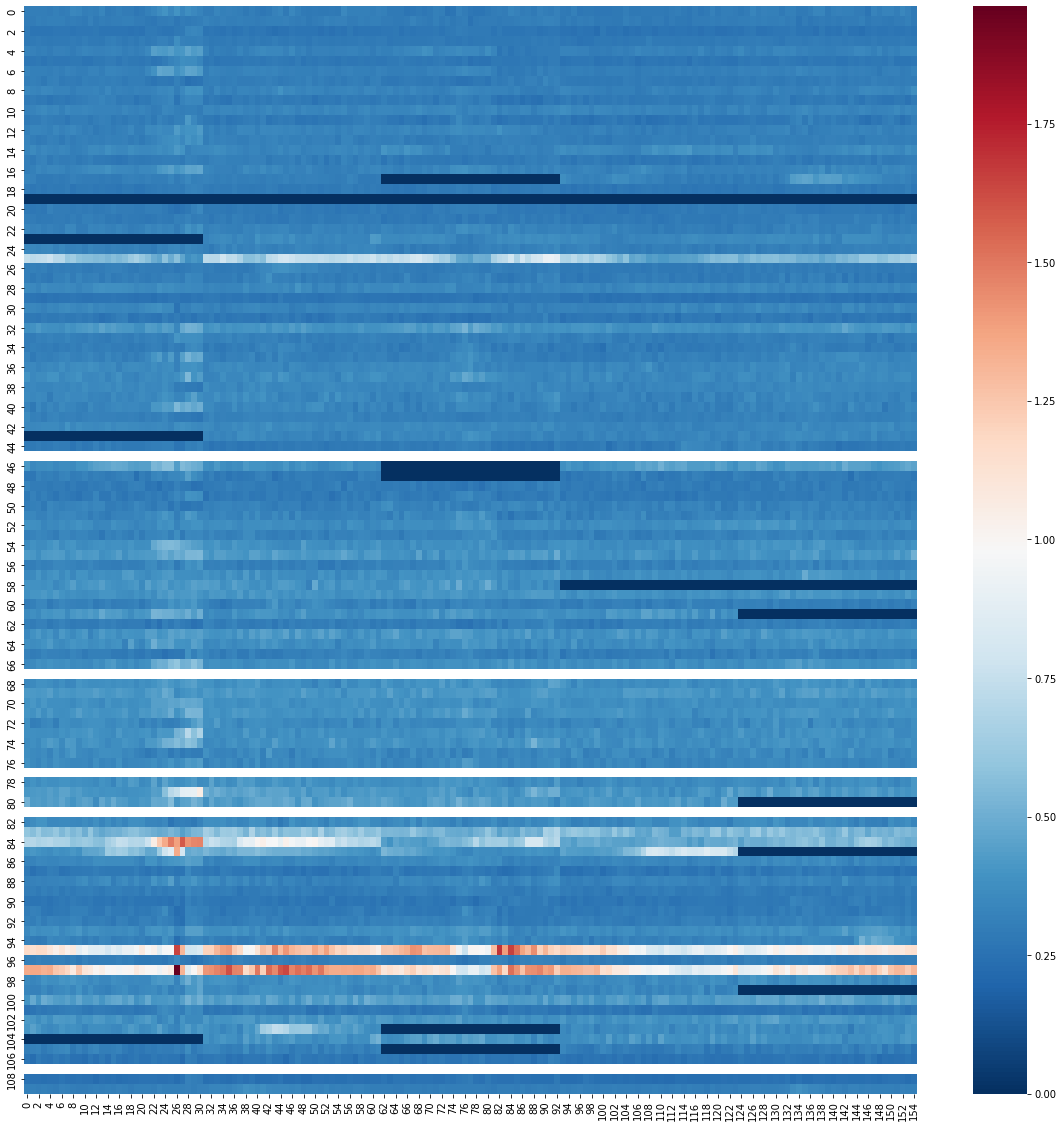

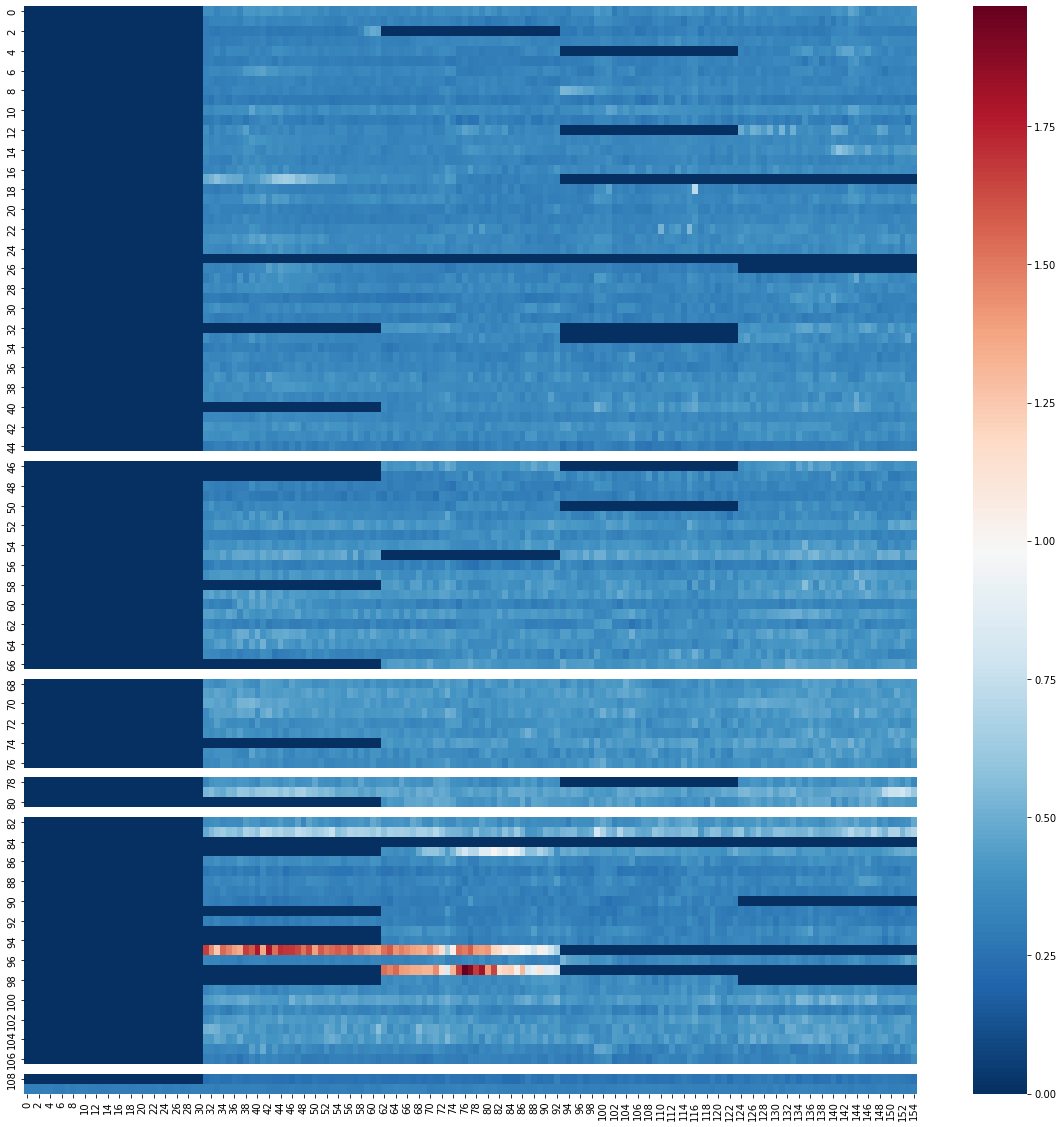

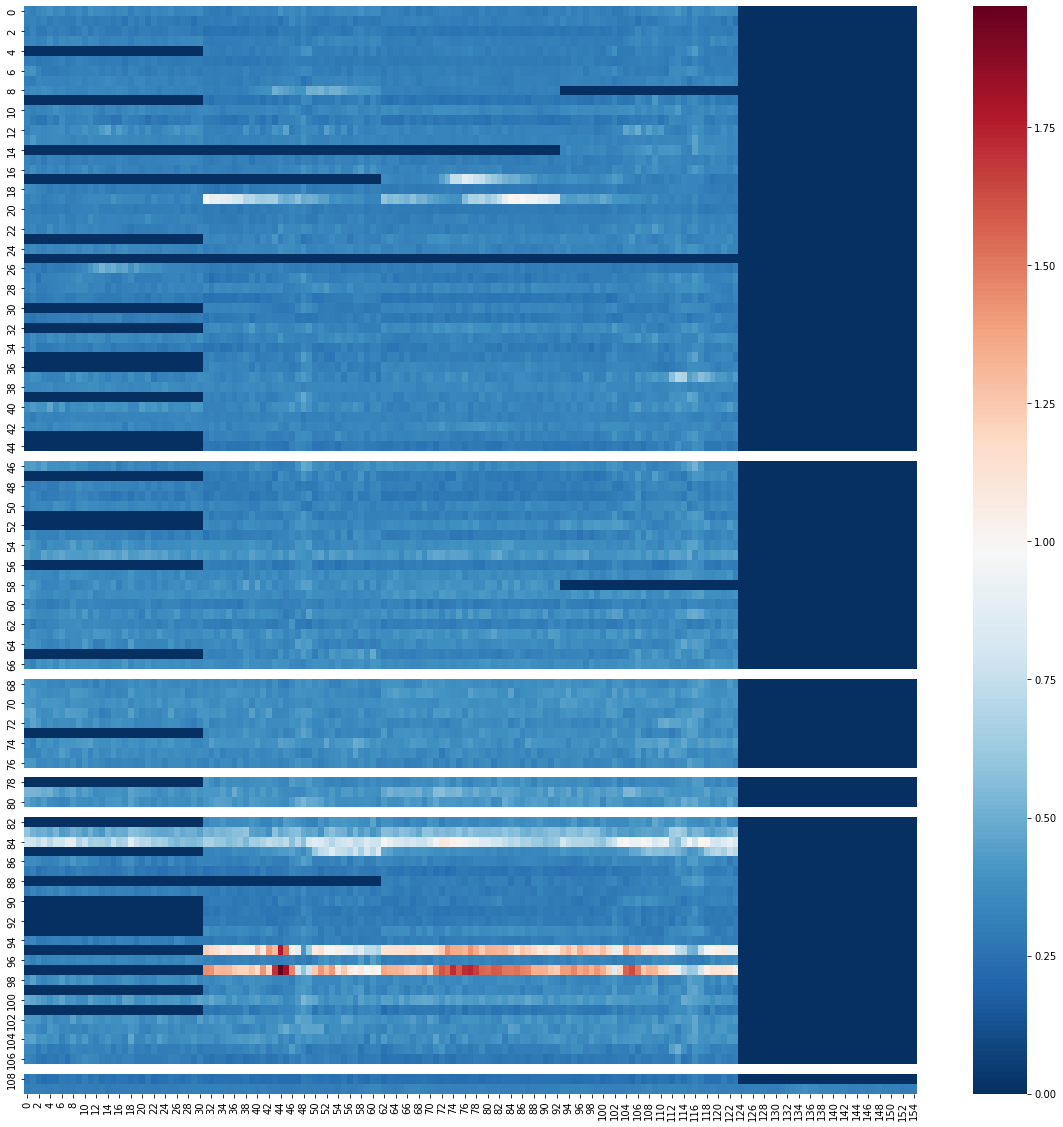

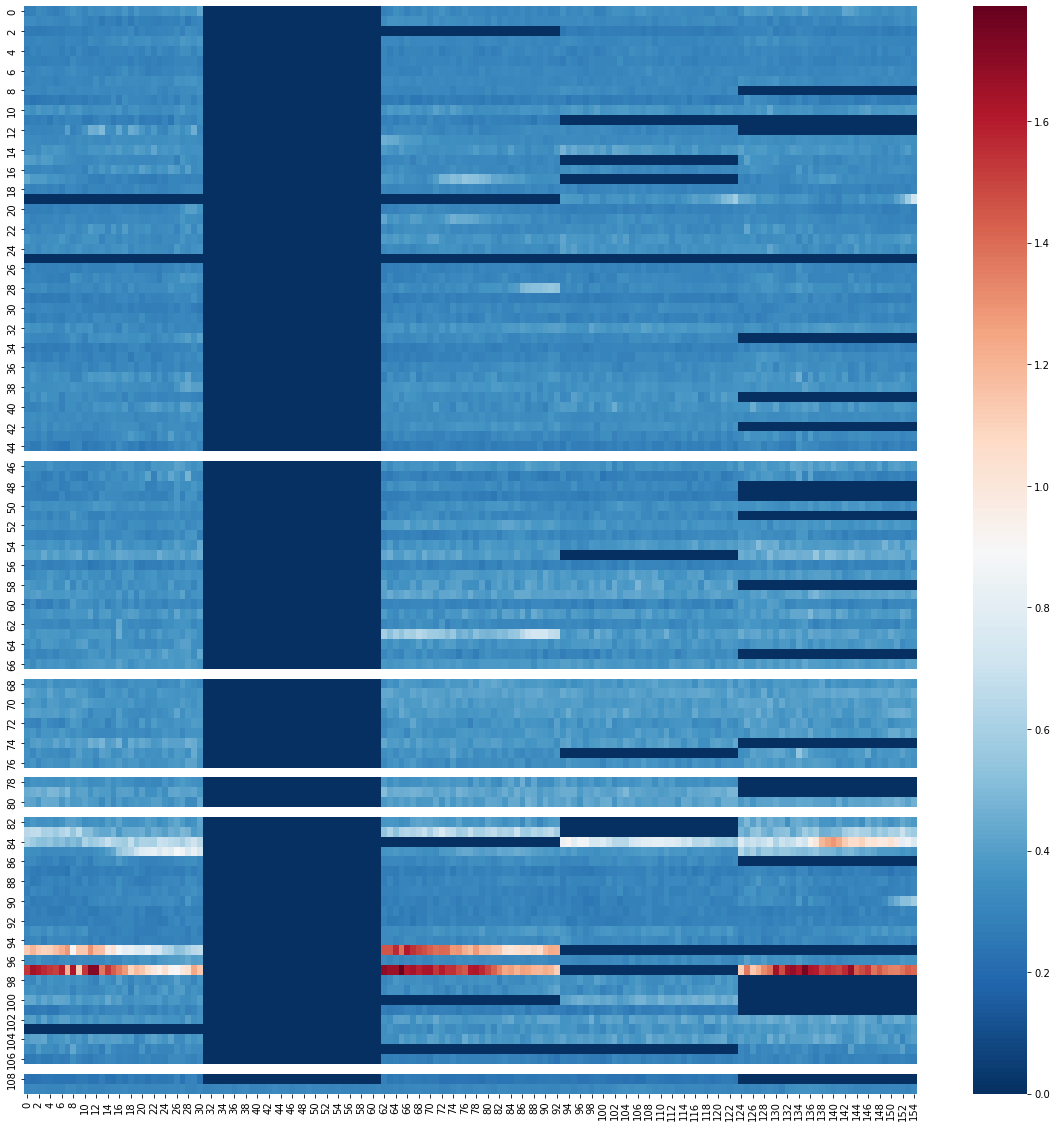

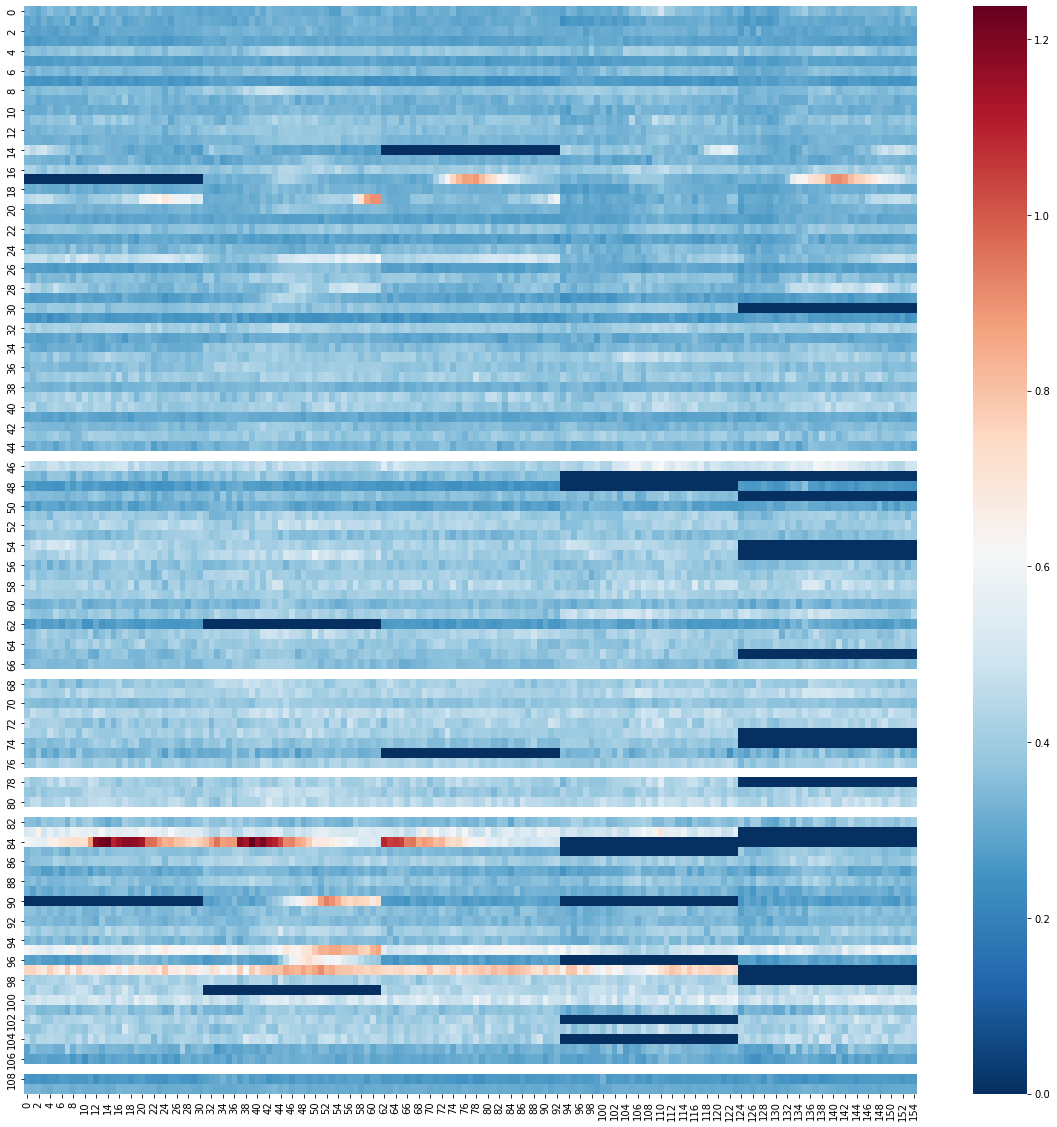

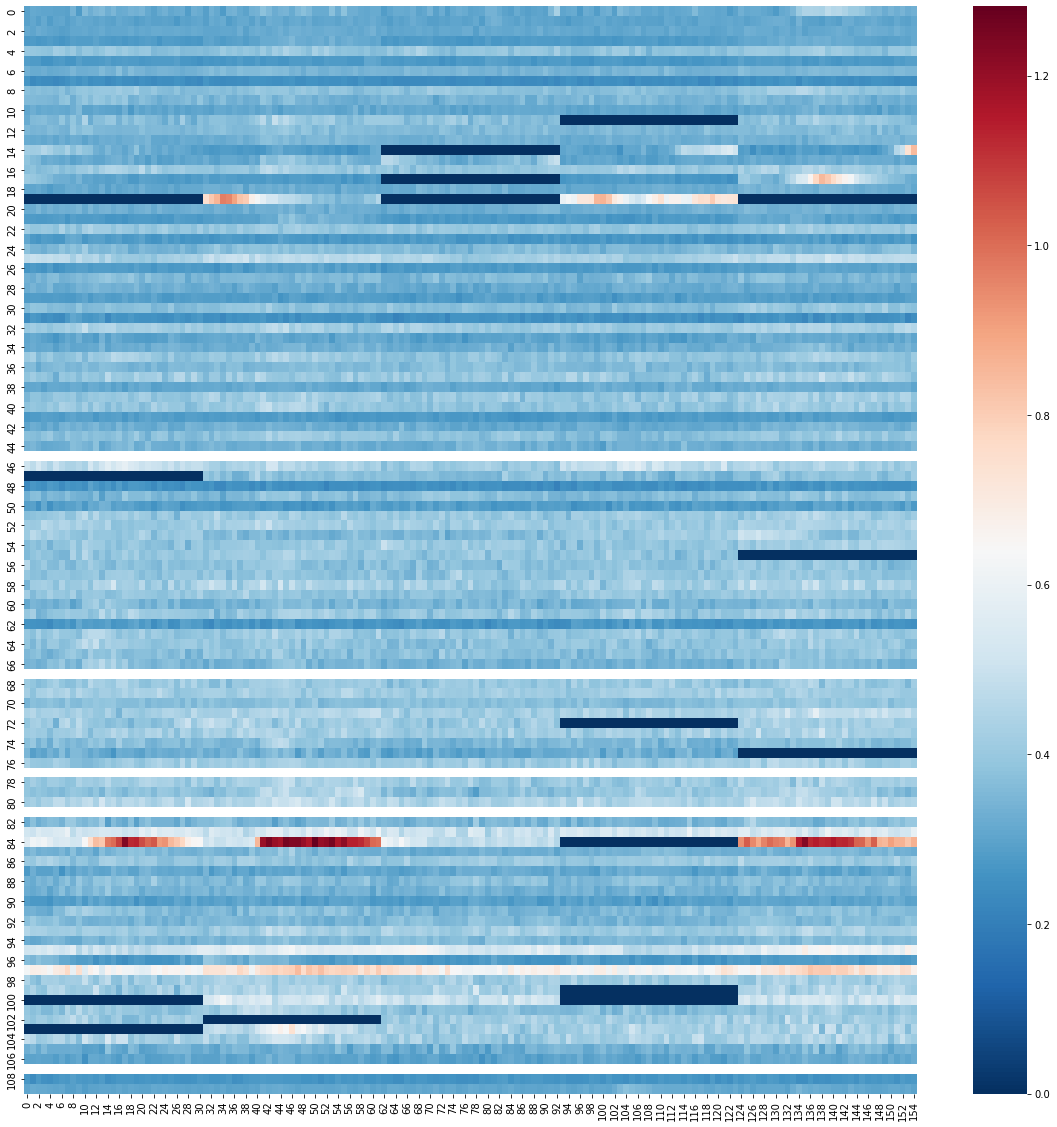

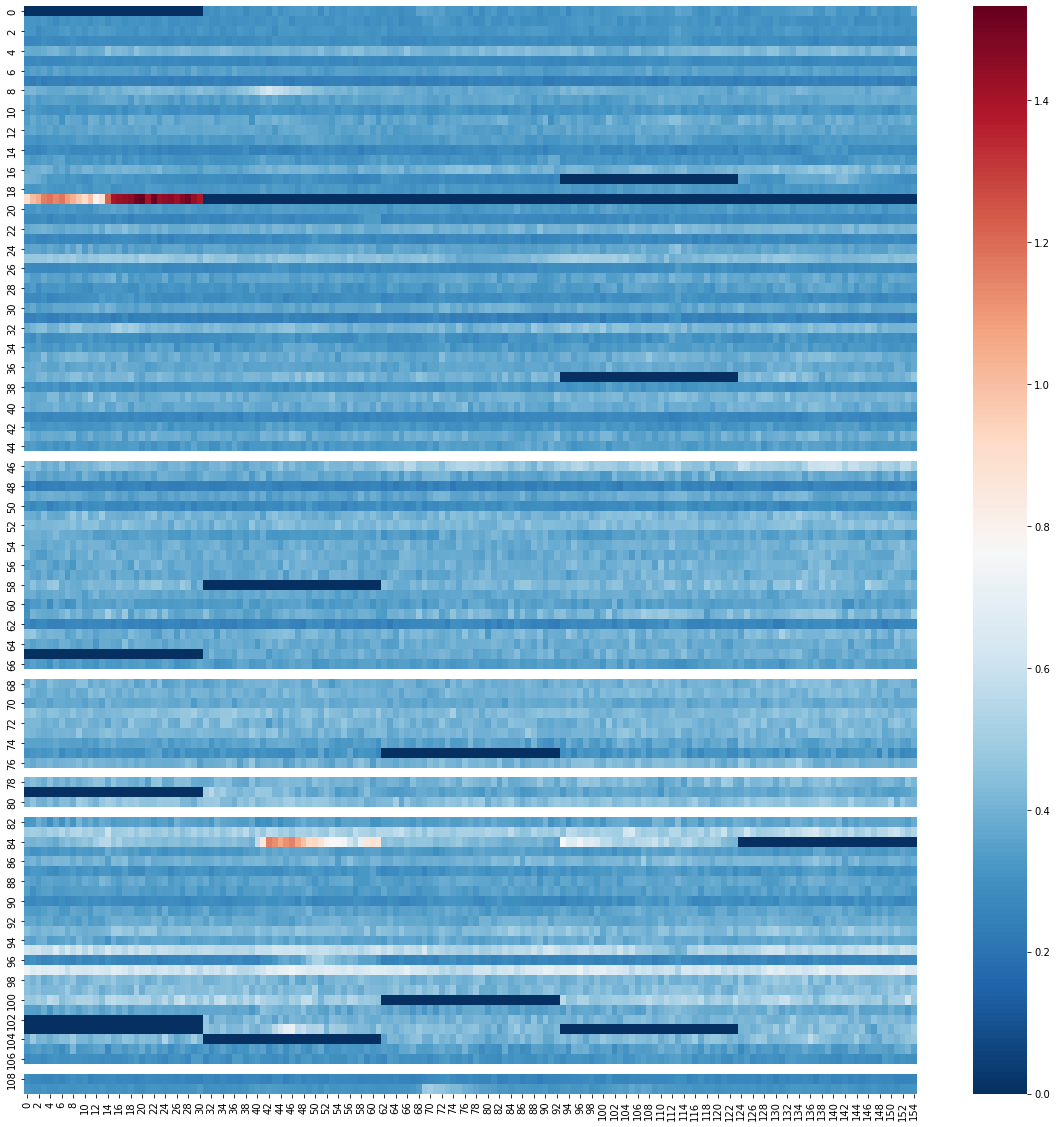

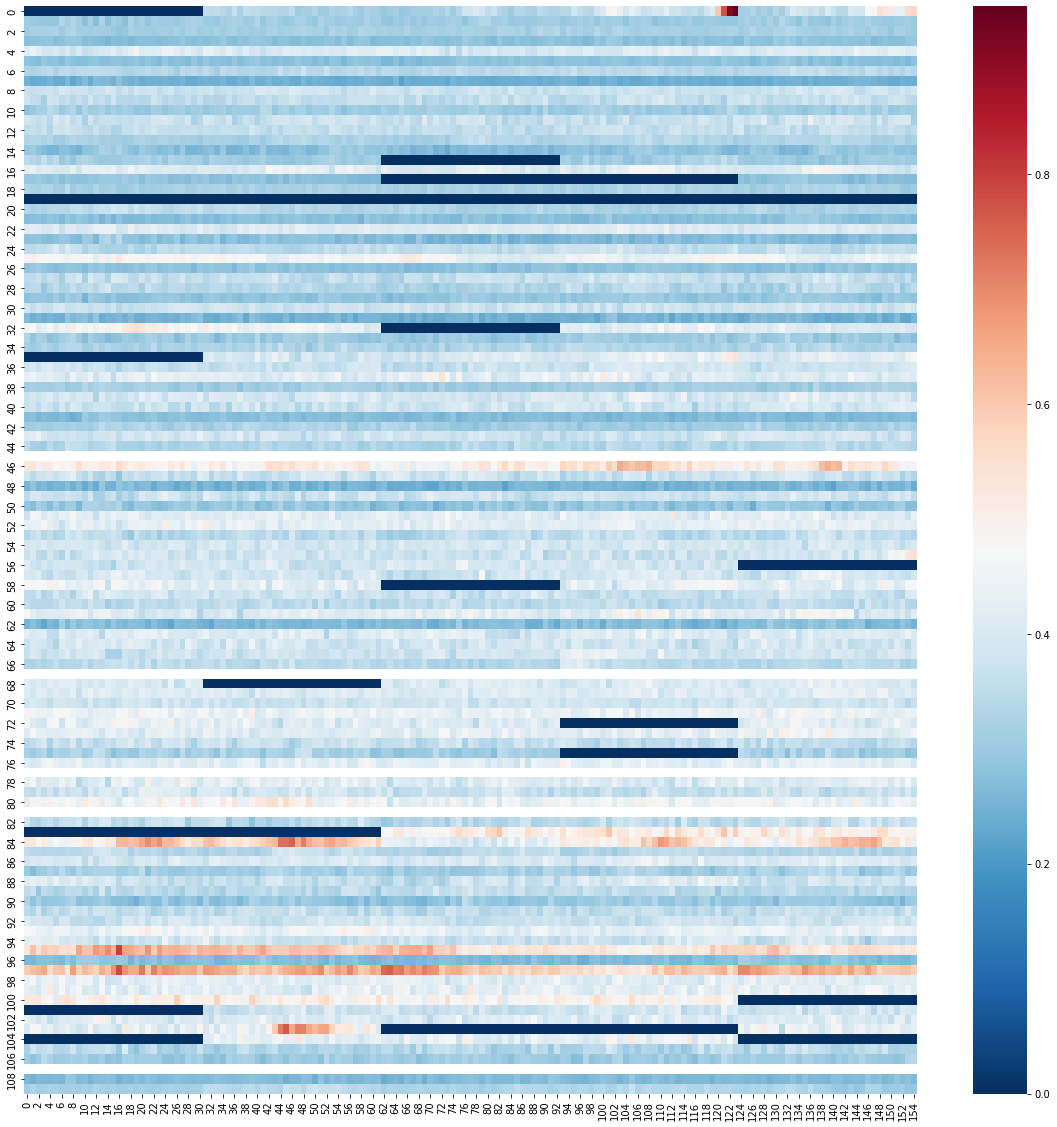

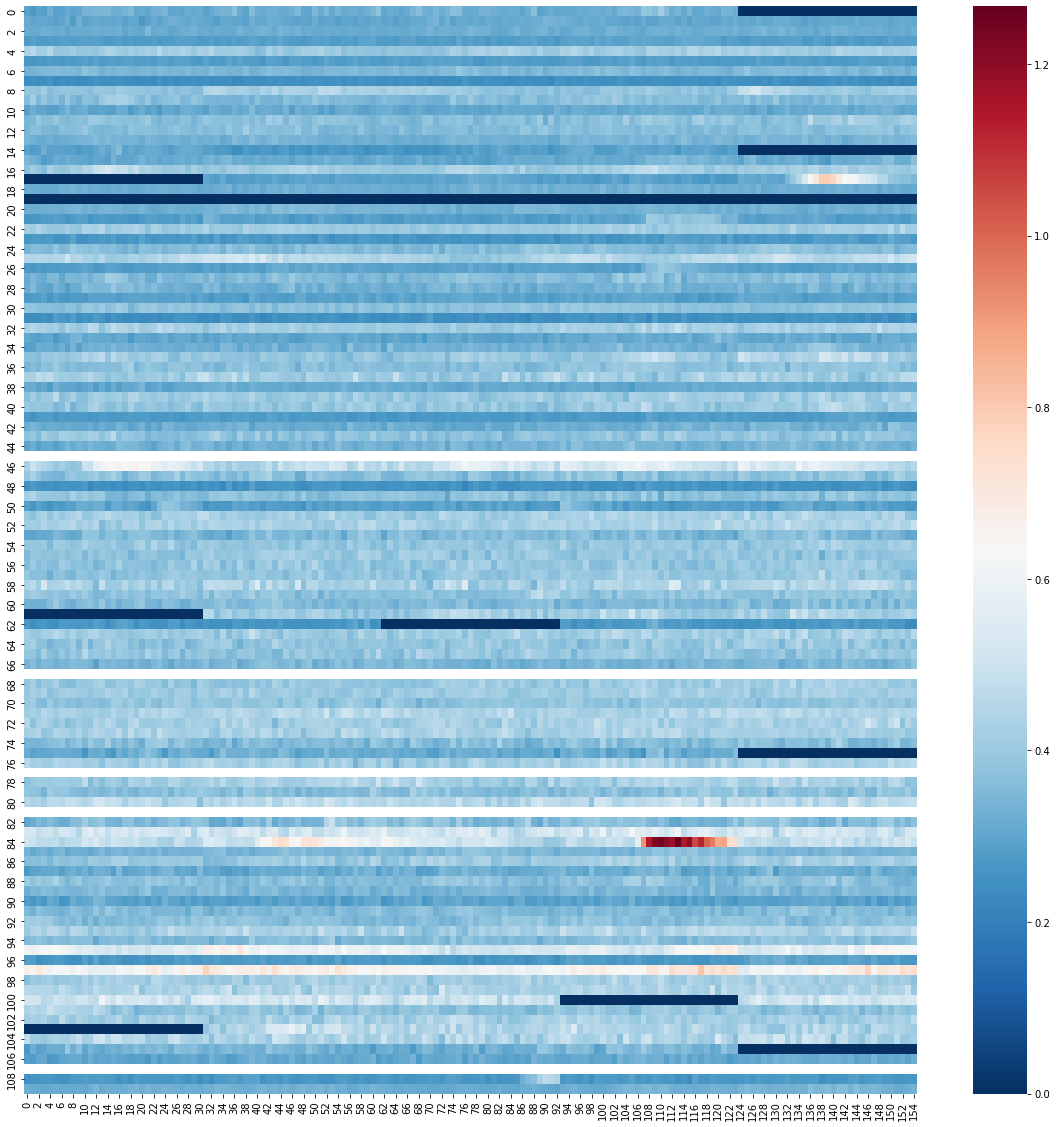

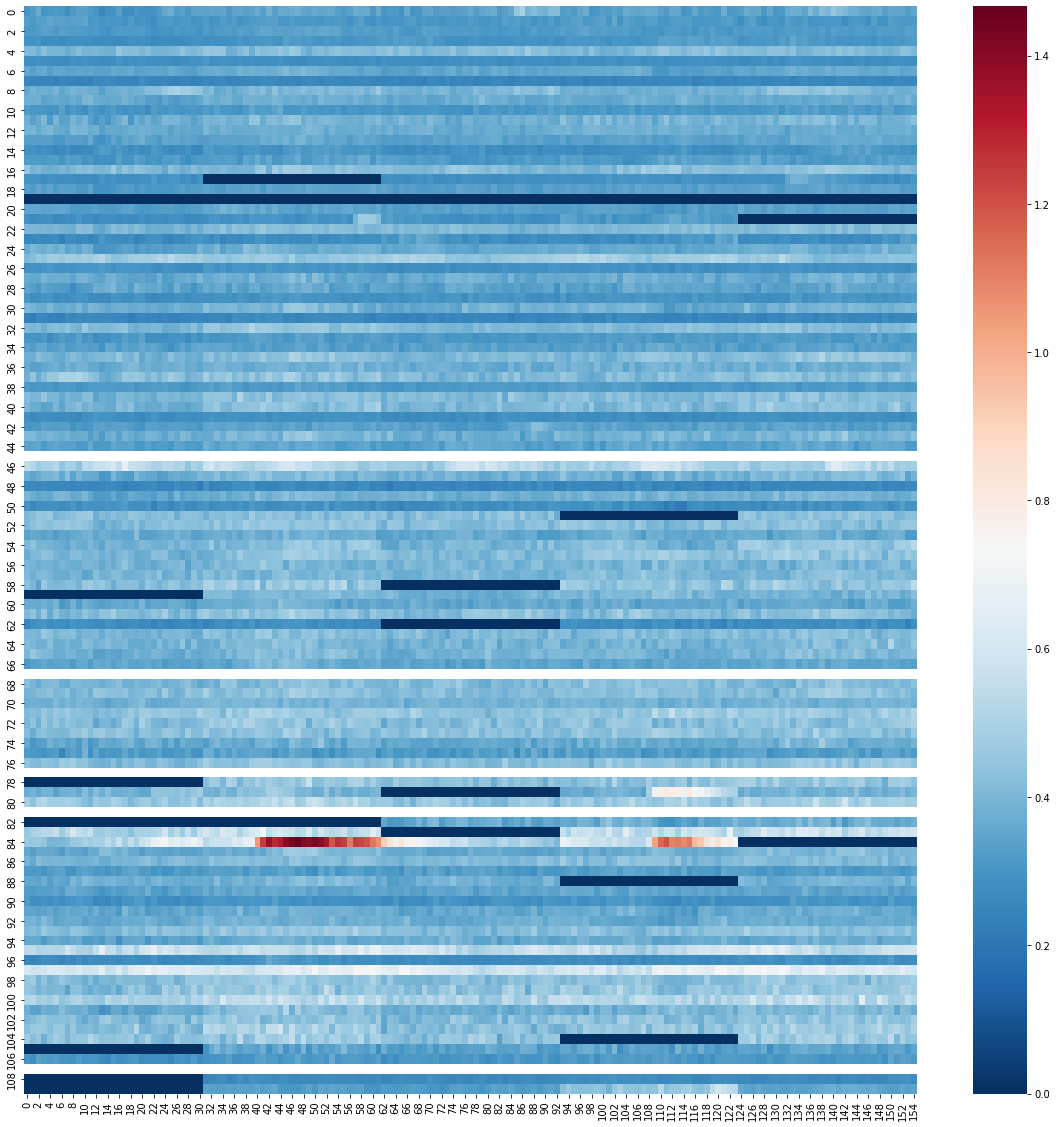

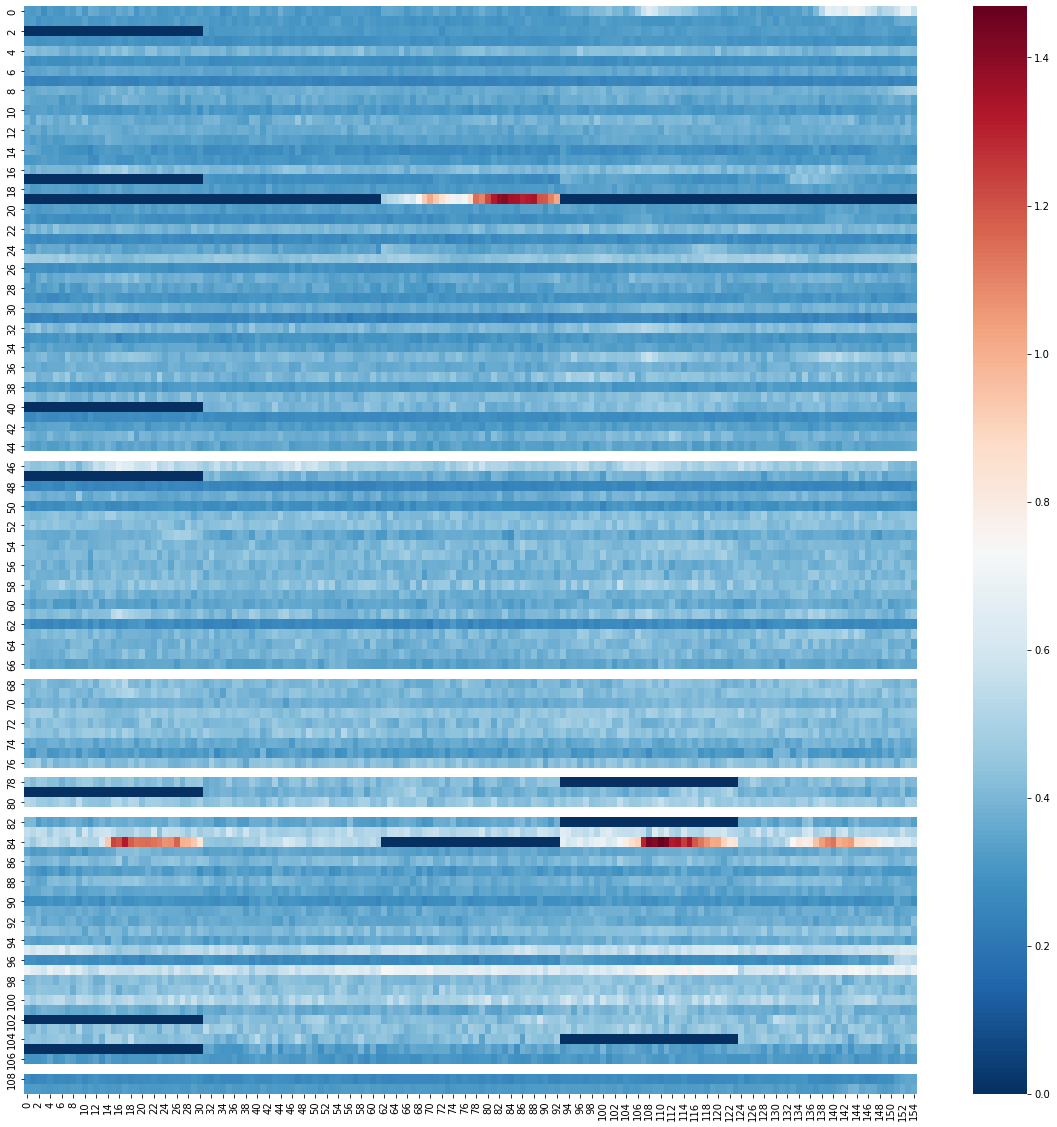

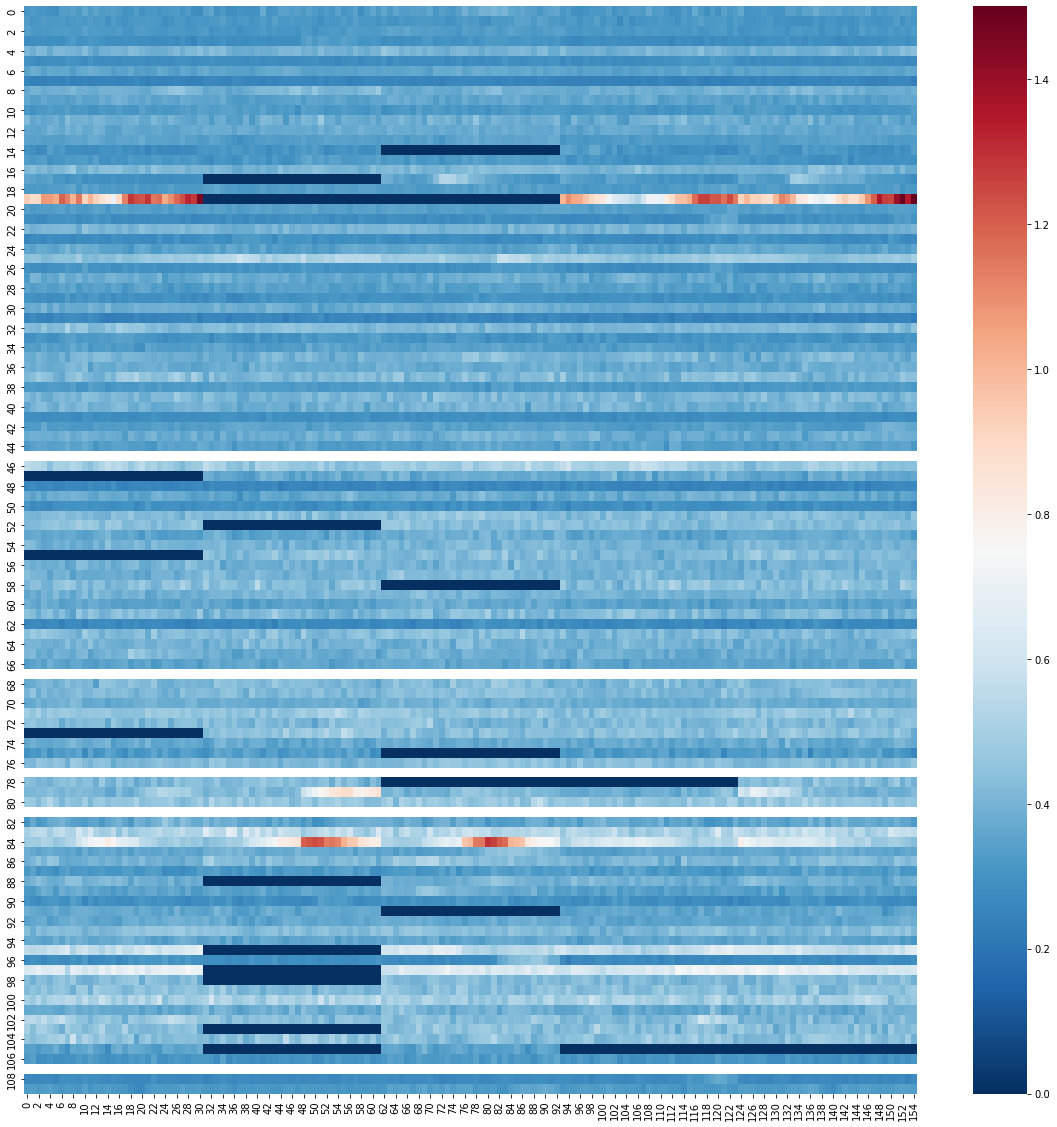

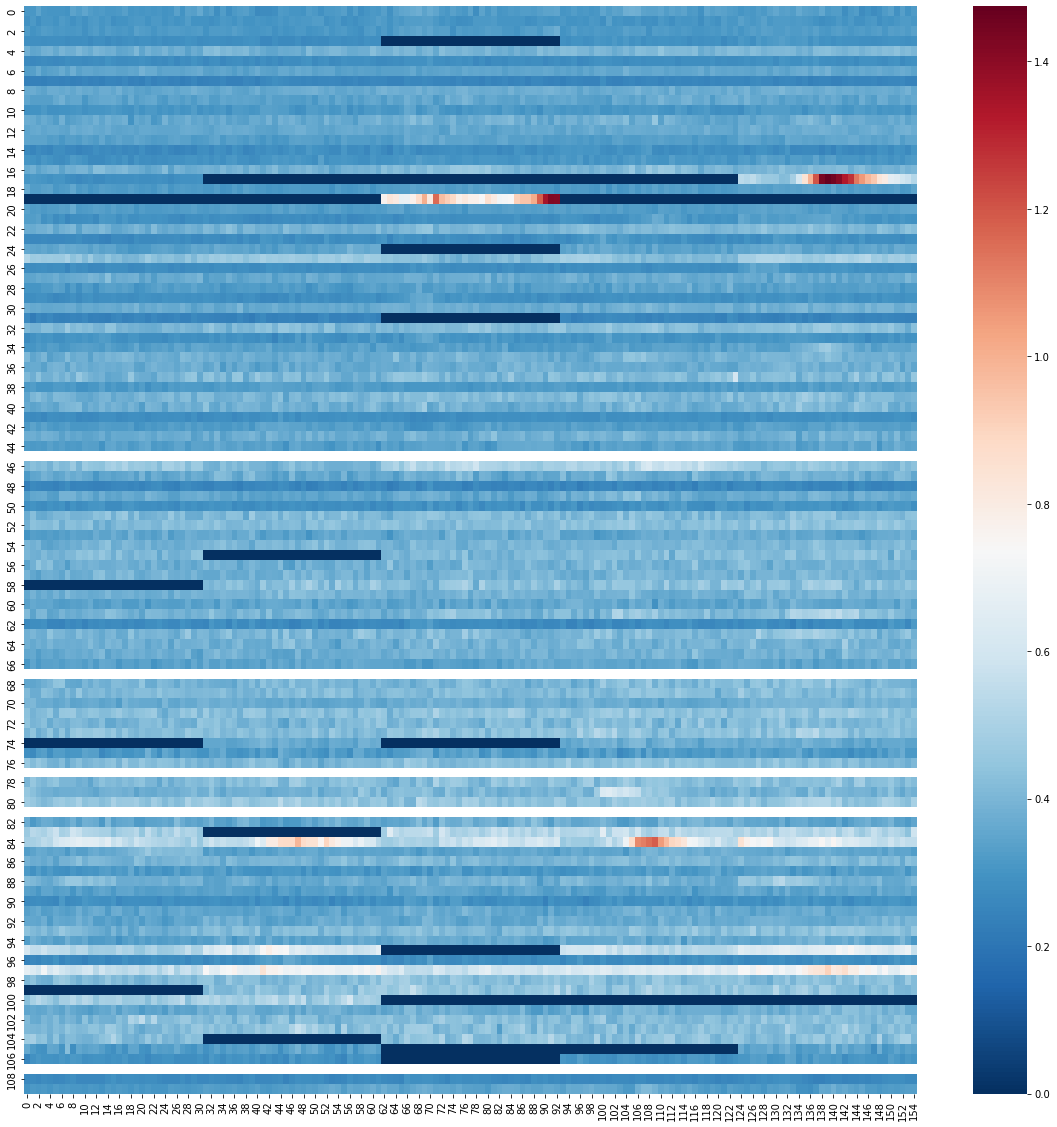

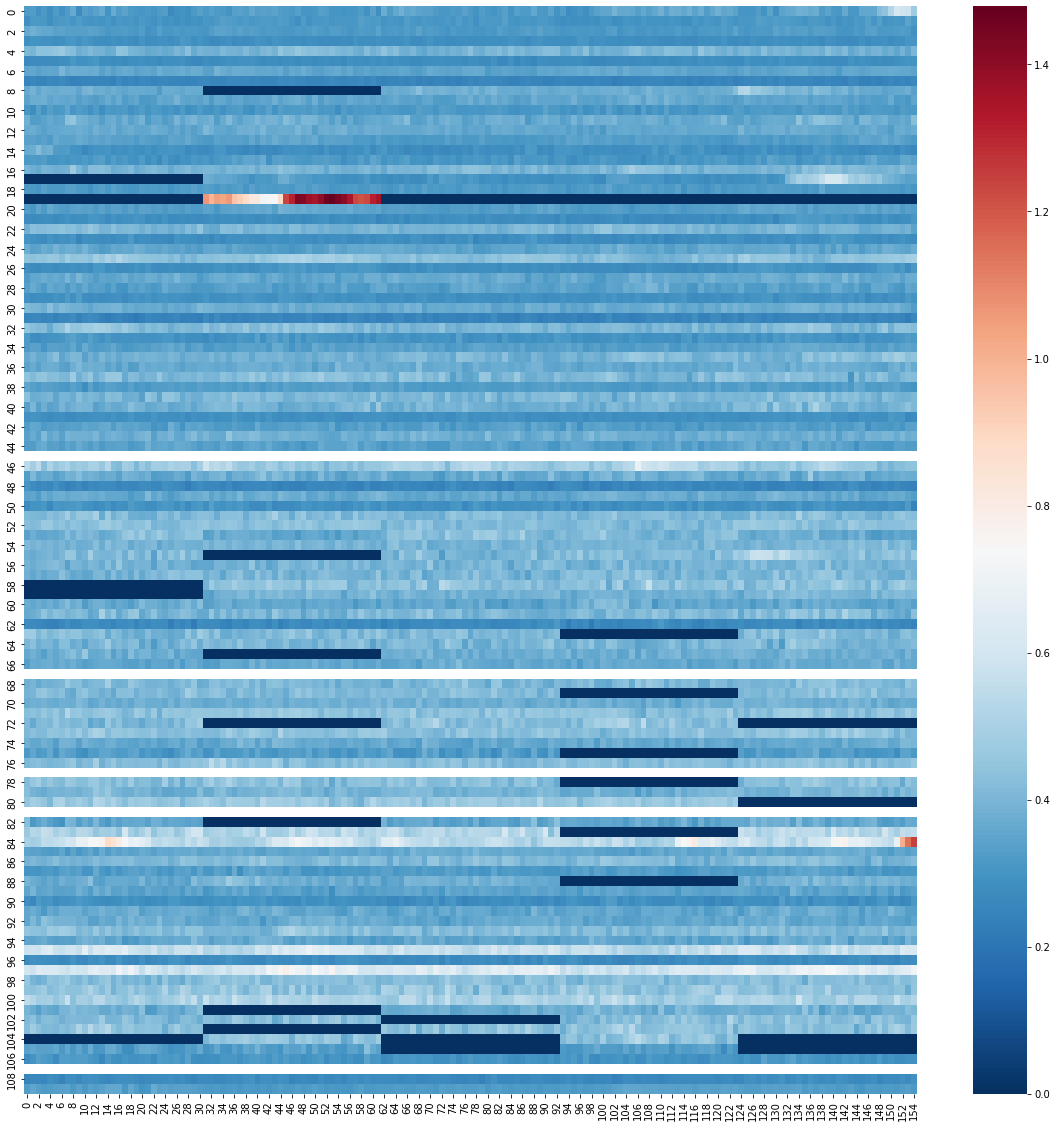

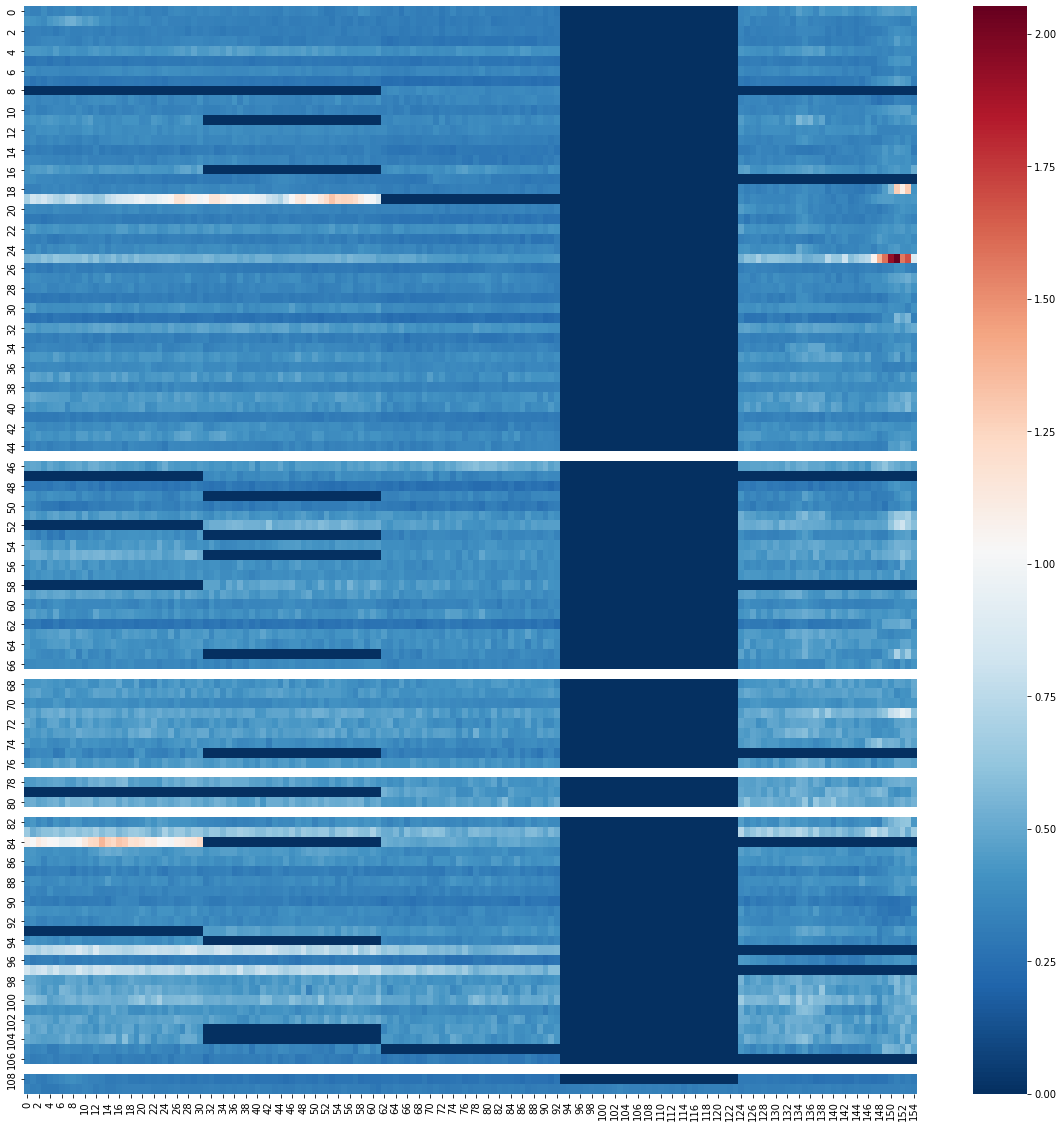

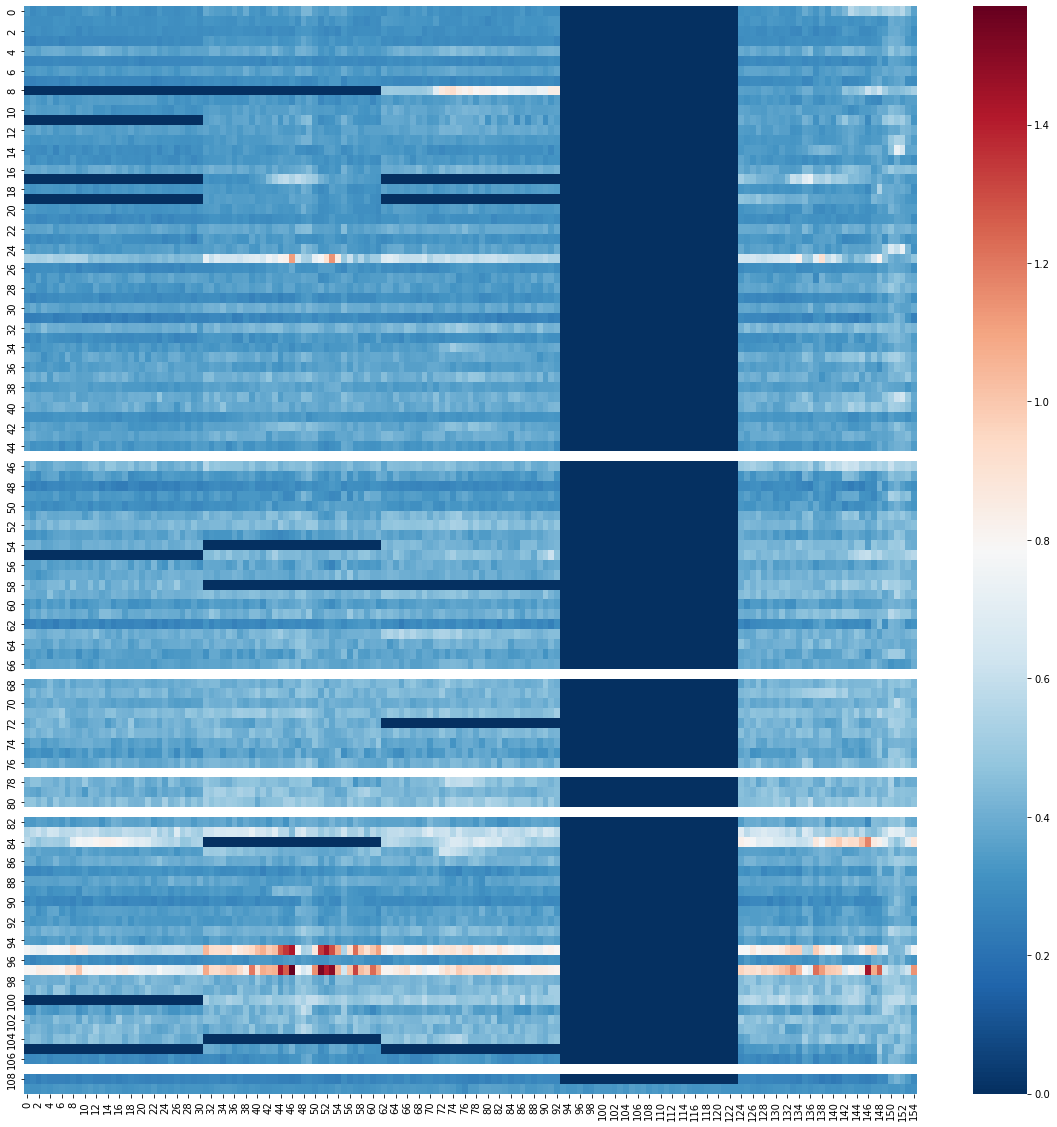

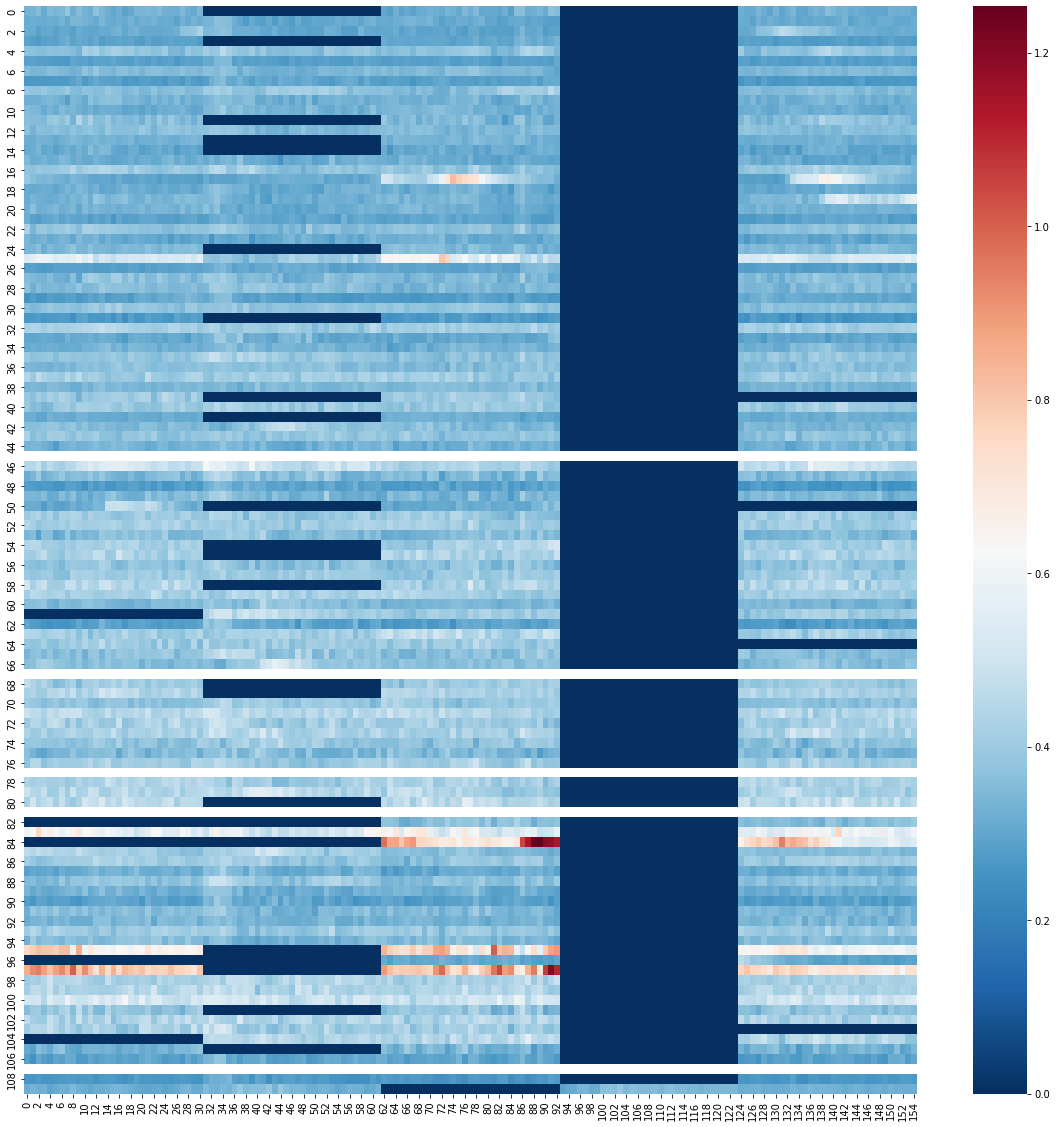

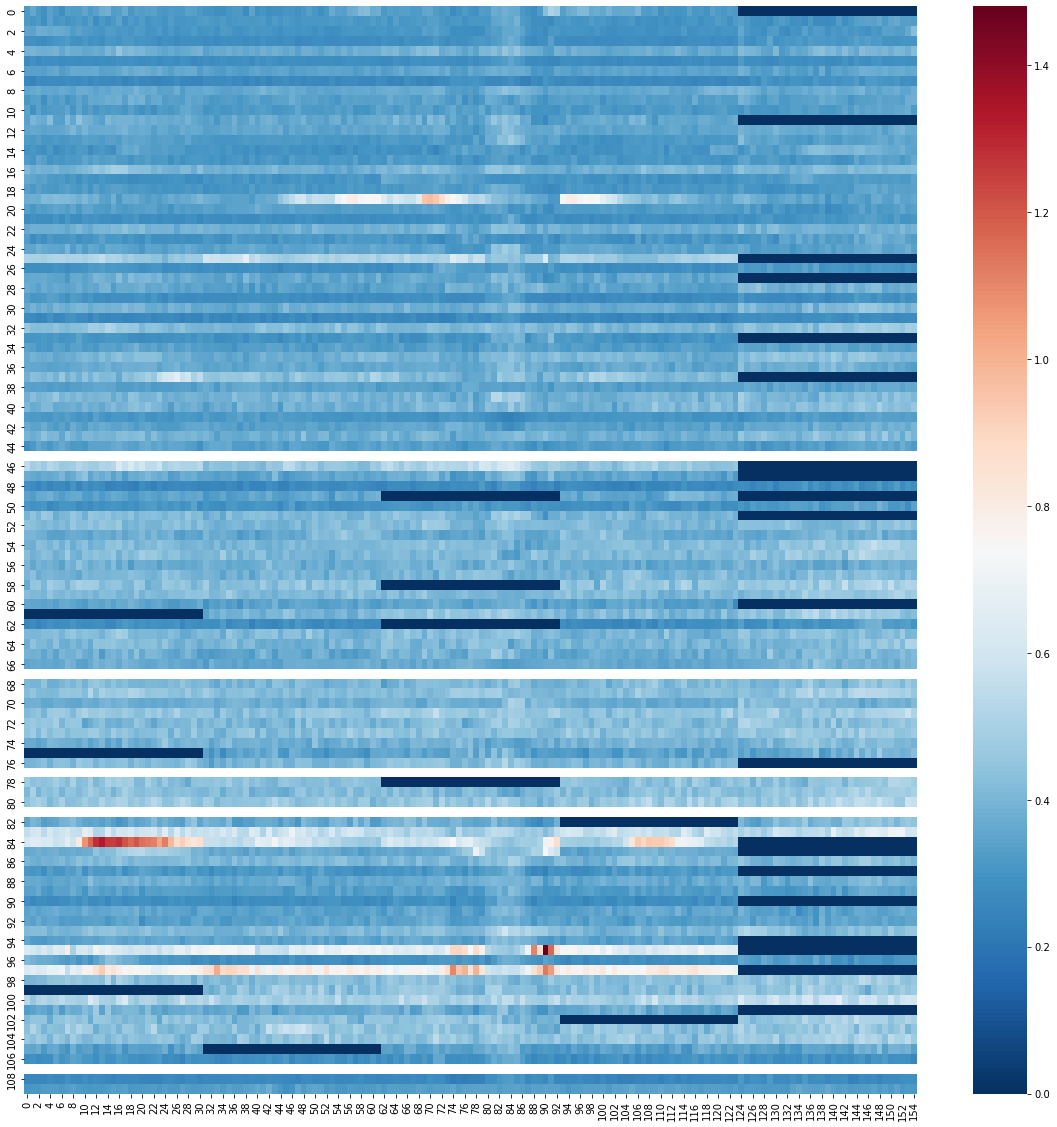

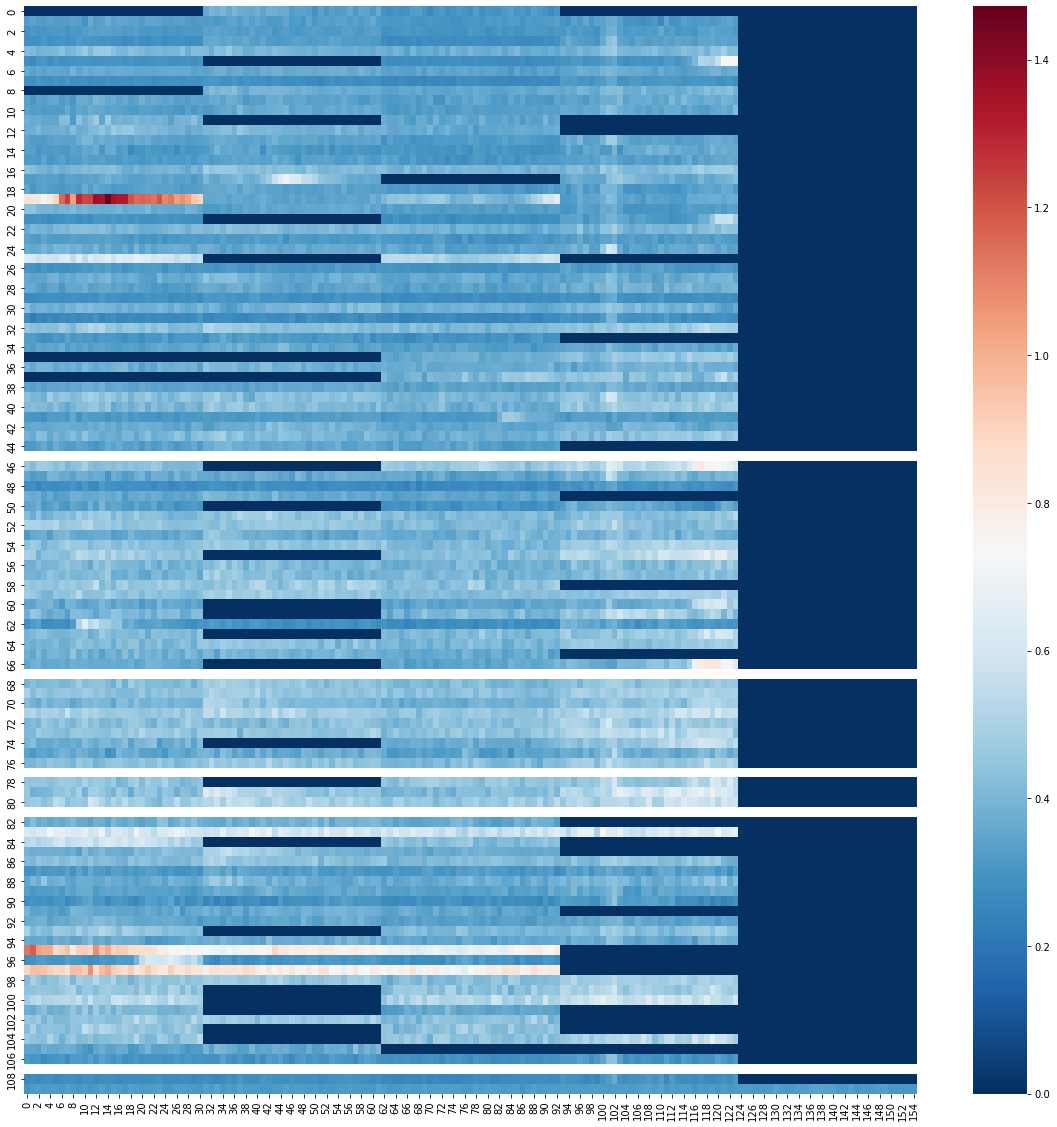

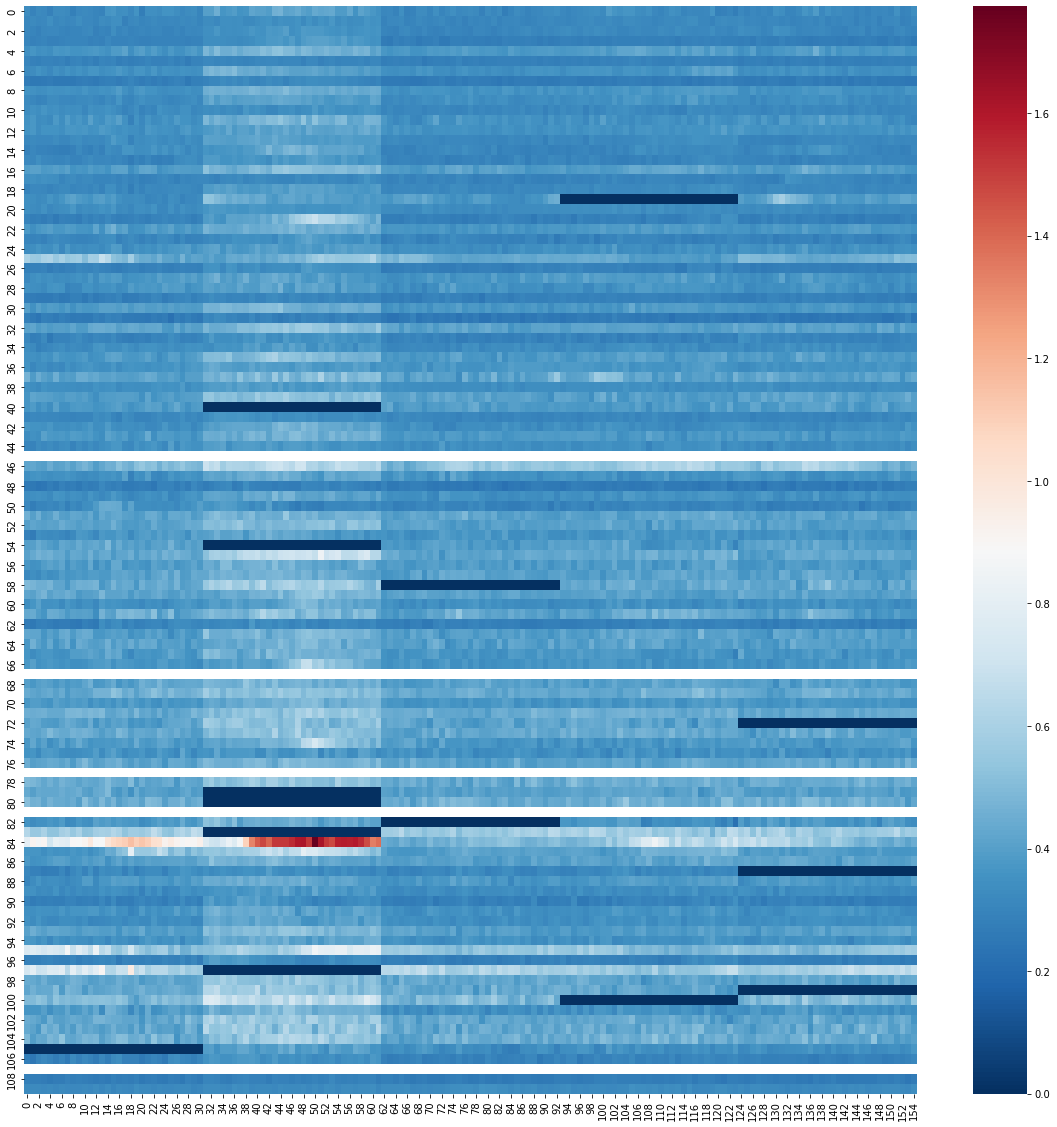

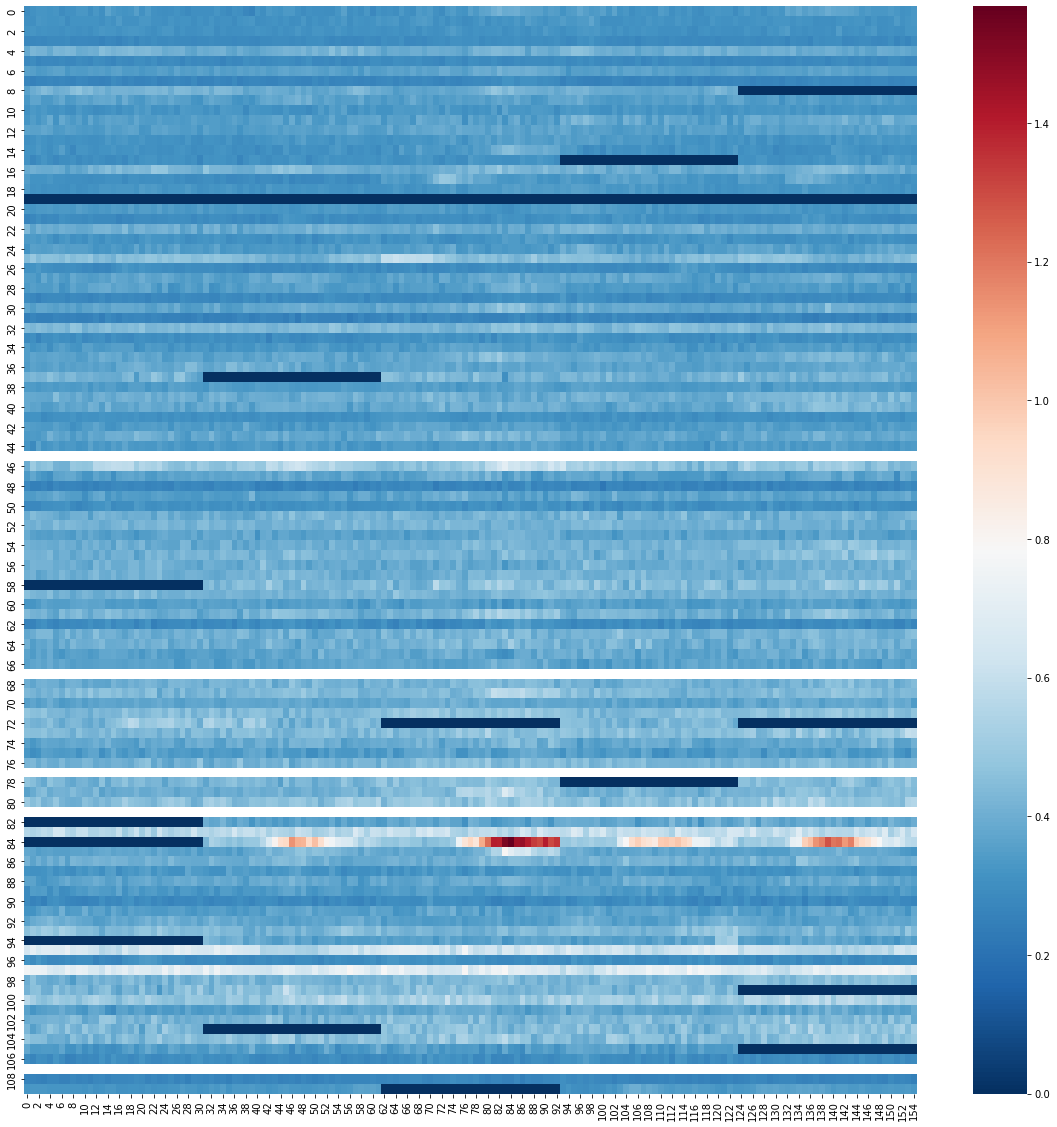

In [80]:
#lenghts of each trial
index = [0, 118, 88, 100, 98, 109, 78, 121, 76, 113, 97, 112, 118]

for trial in range(1,len(index)):
    
    index[trial] = index[trial] + index[trial-1]
    dat_tr = mat_load[index[trial-1] : index[trial]+1, :, :, 0, :, :, :]
    ind_tr = ind_load[index[trial-1] : index[trial]+1, :, :, 0, :, :]

    #choose state
    dat_stan = dat_tr[:, 0, :, :, :, :]
    dat_staw = dat_tr[:, 1, :, :, :, :]
    ind_stan = ind_tr[:, 0, :, :, :]
    ind_staw = ind_tr[:, 1, :, :, :]

    if(trial == 5):
    
        for sesion in range(4):

            #choose session
            dat_sean = dat_stan[:, sesion, :, :, :]
            dat_seaw = dat_staw[:, sesion, :, :, :]
            ind_sean = ind_stan[:, sesion, :, :]
            ind_seaw = ind_staw[:, sesion, :, :]

            for sample in range(50):

                dat_sean_df = dat_sean[:, :, sample, :]
                dat_seaw_df = dat_seaw[:, :, sample, :]
                ind_sean_df = ind_sean[:, :, sample]
                ind_seaw_df = ind_seaw[:, :, sample]

                for time in range(31):
                    dat_sean_df[:,:,time] = np.multiply(dat_sean_df[:,:,time],ind_sean_df)
                    dat_seaw_df[:,:,time] = np.multiply(dat_seaw_df[:,:,time],ind_seaw_df)

                dat_sean_df = dat_sean_df.reshape(dat_sean_df.shape[0],155)
                dat_seaw_df = dat_seaw_df.reshape(dat_seaw_df.shape[0],155)